In [1]:
import pandas as pd
import numpy as np
import dateutil.tz
import datetime as dt
import json

from io import StringIO
import urllib3
import logging
import sys
from json import dumps
import time

def get_ymd(datetime):
    year = datetime.year
    month = datetime.month
    day = datetime.day
            
    if month < 10:
        month = '0' + str(month)
    if day < 10:
        day = '0' + str(day)
    return year, month, day

def first_day_next_month(date):
    return (date.replace(day=1) + dt.timedelta(days=32)).replace(day=1)

def last_second_of_month(date: str) -> str:
    return str((pd.event_timestamp(date) + pd.offsets.MonthEnd(0)).date()) + " 23:59:59"

def first_second_of_month(date: str) -> str:
    return str((pd.event_timestamp(date) + pd.offsets.MonthBegin(0)).date()) + " 00:00:00"

streamer = StringIO()

def setup_logging():
    logger = logging.getLogger()
    for h in logger.handlers:
        logger.removeHandler(h)
     
    h = logging.StreamHandler(stream = streamer)
    h.setFormatter(logging.Formatter("%(asctime)s %(levelname)s: %(message)s",
                              "%Y-%m-%d %H:%M:%S"))
    logger.addHandler(h)
    logger.setLevel(logging.INFO)
    return logger

def query_log(query_id, table, logger):
    status = wr.athena.get_query_execution(query_id)['Status']['State']
    if wr.athena.get_query_execution(query_id)['Status']['State'] in ['FAILED', 'CANCELLED']:
        logger.critical(table + ': query is in ' + status + ' State. ' + 'QueryID: ' + query_id)
    else:
        logger.info(table + ': query is in ' + status + ' State. ' + 'QueryID: ' + query_id)
    return None


In [2]:
# !python -m pip install amazon-textract-caller --upgrade
# !python -m pip install amazon-textract-response-parser --upgrade

In [3]:
# !pip install 

In [4]:
import re
bool(re.match('^[a-zA-Z]', ''))

False

# Static Raw Feature 

In [5]:
def get_cibil_score(cibil_info):
    for item in cibil_info:
        if item.isnumeric():
            return item
    return ''

In [6]:
def get_static_raw_cibil_features(df):
    dfs=[]
    for idx,row in df.iterrows():
        
        user_id = row.name
        gender = row['gender']
        name = row['name']
        total_email = len(row['email'])
        total_phone_nos = len(row['phone_no'])
        dob = row['dob']
        user_identifier = row['user_identifier']
        # remove from startic in final version
#         age = get_age(date(int(dob_list[2]),int(dob_list[1]),int(dob_list[0])))
        cibil_score = get_cibil_score(row['cibil_info_with_factors'])
        total_address = len(row['address'])
        total_loans = len(row['account_info'])

        df_static = pd.DataFrame({ 'user_id' : [user_id], 'name':[name],'gender':[gender], 'total_email':[total_email],'dob':[dob],'cibil_score':[cibil_score],
                       'total_address':[total_address],'total_loans':[total_loans],'total_phone_nos': [total_phone_nos], 'user_identifier':[user_identifier] })
        dfs.append(df_static)
    return pd.concat(dfs)
    

In [7]:
! ls ../cibil_data/train/

cibil_out  cibil_pdf  errors.csv  new_cibil_out  new_cibil_pdf


In [8]:
# !ls ../cibil_data/parsed_data/

In [9]:
import glob 
all_csv = glob.glob('../cibil_data/train/cibil_out/*.csv') + glob.glob('../cibil_data/train/new_cibil_out/*.csv')

In [900]:
all_test_csv = glob.glob('../cibil_data/parsed_data/*.csv')

In [11]:
dfs = []
for csv in all_csv:
    dfs.append(pd.read_csv(csv))
dfs = pd.concat(dfs)

In [901]:
df_test_list = []
for csv in all_test_csv:
    df_test_list.append(pd.read_csv(csv))

In [902]:
df_test = pd.concat(df_test_list)

In [904]:
df_test.shape

(51, 15)

In [905]:
df_test.to_csv('../cibil_data/raw_test_dump.csv',index=False)

In [12]:
dfs.reset_index(inplace=True)

In [913]:
dfs[dfs['phone_no']]

,index,name,gender,cibil_info_with_factors,cibil_name,user_identifier,dob,address,phone_no,email,acc_summary,account_info,enquiry,account_info_new
0,0,SHAIK HUSAN PASHA S/O SHAIK,MALE,"[CIBILTUSC3, PRESENCE OF DELINQUENCY, 645, LOW...",CIBILTUSC3,"{'PAN': 'HQPPS0603K', 'VOTER ID': 'YAV1651389'...",02/02/1980,"[{'address': ' HYDERABAD 501401', 'category': ...","[9100812058, 9100812058, 9100812058, 9864555588]","[SHAIKHUSSIAN1980@GMAIL.COM, SHAIKPASHA2229@GM...","{'total': ' 11', 'overdue': ' 192232', 'zero_b...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member_name': 'NOT DISCLOSED', 'enquiry_dat...","[{'7-22': '028', '6-22': '027', '5-22': '000',..."
1,0,GINAJALA VEERAJU POTHU RAJU,MALE,"[CIBILTUSC3, -1]",CIBILTUSC3,{'VOTER ID': 'IMZ1676123'},01/01/1966,[{'address': ' DNO 5-99 RAMALAYAM STREET VALAS...,[9849459594],[],"{'total': ' 0', 'overdue': ' 0', 'zero_balance...",[],"[{'member_name': 'TVS CREDIT', 'enquiry_date':...",[]
2,0,KORRA RAVI,MALE,"[CIBILTUSC3, INCREASE IN NON-MORTGAGE INDEBTED...",CIBILTUSC3,"{'PAN': 'BUKPK3225N', 'RATION CARD': '12357056...",02/04/1980,"[{'address': ' NALGONDA 508248', 'category': '...","[9912597187, 8179385999]",[],"{'total': ' 1', 'overdue': ' 0', 'zero_balance...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member_name': 'NOT DISCLOSED', 'enquiry_dat...","[{'7-22': 'STD', '6-22': 'STD', '5-22': 'STD',..."
3,0,SANAGAPALLI SARADHA,FEMALE,"[CIBILTUSC3, PRESENCE OF DELINQUENCY, 757, HIG...",CIBILTUSC3,"{'PAN': 'FMEPS5341P', 'VOTER ID': 'ZAF0660556'...",21/07/1993,[{'address': ' PROPRIETOR OF VENKATESWARA FANC...,"[8790484323, 918790484323, 6301831245, 0919866...",[SARADHA.SANAGAPALLI93@GMAIL.COM],"{'total': ' 7', 'overdue': ' 0', 'zero_balance...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member': 'NOT DISCLOSED', 'enquiry_date': '...","[{'7-22': '000', '6-22': '000', '5-22': '000',..."
4,0,MEKA SRINU,MALE,"[CIBILTUSC3, CREDIT AGE LESS THAN SIX MONTHS, ...",CIBILTUSC3,"{'PAN': 'HPOPM6548R', 'VOTER ID': 'UDD0141804'}",01/01/1987,[{'address': ' 2-5/A CHINA BHIMPALLI DEVIPATNA...,[9908844706],[],"{'total': ' 1', 'overdue': ' 0', 'zero_balance...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member_name': 'NOT DISCLOSED', 'enquiry_dat...",[{'9-22': 'STD'}]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,0,VINOREXLINE AR,FEMALE,"[CIBILTUSC3, INCREASE IN NON-MORTGAGE INDEBTED...",CIBILTUSC3,"{'PAN': 'CIJPV7471D', 'VOTER ID': 'TRQ0365726'...",05/06/1991,"[{'address': ' CHENNAI 600001', 'category': ' ...","[8754340814, 8754430814, 9751567365, 9940674974]","[NOEMAIL@YESBANK.IN, AROCKIAANNAITRANSPORT2018...","{'total': ' 17', 'overdue': ' 0', 'zero_balanc...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member': 'NOT DISCLOSED', 'enquiry_date': '...","[{'10-22': '000'}, {'10-22': '000'}, {'10-22':..."
1312,0,SAGAR VASANTRAO LANDGE LANDGE,MALE,"[CIBILTUSC3, PRESENCE OF DELINQUENCY, 694, PRE...",CIBILTUSC3,"{'PAN': 'ADMPL4711E', 'DRIVING LICENSE': 'MH12...",01/06/1986,"[{'address': ' SR NO.45,GHAR NO.5,JAMBHULWADI ...","[8983026160, 7057609059, 9767699696, 9030409696]",[],"{'total': ' 7', 'overdue': ' 4', 'zero_balance...","[{'ACCOUNT': {'member_name': 'TVS CREDIT', 'ac...","[{'member_name': 'TVS CREDIT', 'enquiry_date':...","[{'5-22': '056', '4-22': '025', '3-22': '000',..."
1313,0,RANKIREDDY NAGESWARA RAO,MALE,"[CIBILTUSC3, PRESENCE OF DELINQUENCY, 654, LOW...",CIBILTUSC3,"{'PAN': 'DUUPR3358M', 'UNIVERSAL ID': '3674329...",02/04/1976,"[{'address': ' BHAGYALAKSHMI KIRANA SHOP ,DNO ...","[6302353368, 8187808456, 9951414449, 9951414449]","[SINIVASADIGITALSHOPY@GMAIL.CO, BNAGA541@GMAIL...","{'total': ' 8', 'overdue': ' 2', 'zero_balance...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member_name': 'NOT DISCLOSED', 'enquiry_dat...","[{'6-22': '000', '5-22': '000', '4-22': '000',..."
1314,0,PANTHAM KRISHNA,MALE,"[CIBILTUSC3, PRESENCE OF DELINQUENCY, 521, PRE...",CIBILTUSC3,"{'PAN': 'DPWPP4740C', 'UNIVERSAL ID': '4037596.

In [13]:
dfs.columns

Index(['index', 'name', 'gender', 'cibil_info_with_factors', 'cibil_name',
       'user_identifier', 'dob', 'address', 'phone_no', 'email', 'acc_summary',
       'account_info', 'enquiry', 'account_info_new'],
      dtype='object')

In [14]:
change_cols = ['cibil_info_with_factors', 'address', 'phone_no', 'email', 'acc_summary', 'account_info','enquiry','account_info_new']

In [15]:
for col in change_cols:
    dfs[col] = dfs[col].apply(lambda x:eval(x))

In [899]:
# dfs.to_csv('../cibil_data/raw_dump_train_data.csv',index=False)

In [17]:
df_static = get_static_raw_cibil_features(dfs)

In [18]:
df_static

,user_id,name,gender,total_email,dob,cibil_score,total_address,total_loans,total_phone_nos,user_identifier
0,0,SHAIK HUSAN PASHA S/O SHAIK,MALE,4,02/02/1980,645,4,11,4,"{'PAN': 'HQPPS0603K', 'VOTER ID': 'YAV1651389'..."
0,1,GINAJALA VEERAJU POTHU RAJU,MALE,0,01/01/1966,,1,0,1,{'VOTER ID': 'IMZ1676123'}
0,2,KORRA RAVI,MALE,0,02/04/1980,712,4,1,2,"{'PAN': 'BUKPK3225N', 'RATION CARD': '12357056..."
0,3,SANAGAPALLI SARADHA,FEMALE,1,21/07/1993,757,3,7,4,"{'PAN': 'FMEPS5341P', 'VOTER ID': 'ZAF0660556'..."
0,4,MEKA SRINU,MALE,0,01/01/1987,747,2,1,1,"{'PAN': 'HPOPM6548R', 'VOTER ID': 'UDD0141804'}"
...,...,...,...,...,...,...,...,...,...,...
0,1311,VINOREXLINE AR,FEMALE,4,05/06/1991,738,4,17,4,"{'PAN': 'CIJPV7471D', 'VOTER ID': 'TRQ0365726'..."
0,1312,SAGAR VASANTRAO LANDGE LANDGE,MALE,0,01/06/1986,694,4,7,4,"{'PAN': 'ADMPL4711E', 'DRIVING LICENSE': 'MH12..."
0,1313,RANKIREDDY NAGESWARA RAO,MALE,2,02/04/1976,654,2,8,4,"{'PAN': 'DUUPR3358M', 'UNIVERSAL ID': '3674329..."
0,1314,PANTHAM KRISHNA,MALE,0,18/05/1990,521,2,1,3,"{'PAN': 'DPWPP4740C', 'UNIVERSAL ID': '4037596..."


## DPD Table

In [19]:
# df_nested_list['AccountInformation']

   - proper case/form for overdue calculation for all type of loans 
   - STD ~0 or not for v0 ? 
   - skip overdue for v0 
           -- schedule pmt 

In [20]:
# (df_nested_list['AccountInformation'][0][0]['AMOUNTS']['SanctionedAmount'])

In [21]:
def get_timestamp(dpd_list):
    final_json = {}
    if (len(dpd_list)) > 0:
        
        yrs = list(dpd_list.keys())[::-1]
        
        for item in yrs:
            dpd_elem = dpd_list[item]
            for k,v in dpd_elem.items():
    #             print(k,v)
                final_json[k+'-'+item]=v
    return final_json
    

In [22]:
df_static.columns

Index(['user_id', 'name', 'gender', 'total_email', 'dob', 'cibil_score',
       'total_address', 'total_loans', 'total_phone_nos', 'user_identifier'],
      dtype='object')

In [23]:
# dfs

In [24]:
for k,v in (dfs['account_info'][0][0]['DPD_INFO']).items():
    print(pd.to_datetime(k,format='%m-%y'))

2022-07-01 00:00:00
2022-06-01 00:00:00
2022-05-01 00:00:00
2022-04-01 00:00:00
2022-03-01 00:00:00
2022-02-01 00:00:00
2022-01-01 00:00:00
2021-12-01 00:00:00
2021-11-01 00:00:00
2021-10-01 00:00:00
2021-09-01 00:00:00
2021-08-01 00:00:00
2021-07-01 00:00:00


In [25]:
def get_dpd_raw_table(df):
    dfs = [] 
    
    for idx,row in df.iterrows():
        user_id = row.name 
        acc_info_list = row['account_info']
        dpd_info_json = row['account_info_new']
        for i in range(len(acc_info_list)):
            loan_id = i 
            loan_info = acc_info_list[i]
            sanc_amount =''
            loan_type = loan_info['ACCOUNT']['TYPE']
            ownership = loan_info['ACCOUNT']['ownership']
            if 'sanctioned' in loan_info['AMOUNTS']:
                sanc_amount=loan_info['AMOUNTS']['sanctioned']
            interest_rate = loan_info['AMOUNTS']['interest_rate']
            repayment_tenure = loan_info['AMOUNTS']['repay_tenure']
            emi_amount = loan_info['AMOUNTS']['emi']
            pmt_freq = loan_info['AMOUNTS']['pmt_freq']
            open_date = loan_info['DATES']['opened']
            closed_date = loan_info['DATES']['closed']
#             dpd_list = loan_info['PaymentHistory']['dayPayDue']
            timestamp_json = dpd_info_json[i]
            for k,v in timestamp_json.items():
                is_open=1
                is_closed=0
                ## dd-mm-yyyy
                
                
#                     print(closed_date)
                    

                curr_timestamp = pd.to_datetime(k,format='%m-%y')
                closed_date_m_y = pd.to_datetime(closed_date,dayfirst=True)
                try:
                    if len(closed_date.split('-'))>=3:

                        if curr_timestamp.year==closed_date_m_y.year and curr_timestamp.month==closed_date_m_y.month:
                            is_open=0
                            is_closed=1
                except:
                    is_open=1
                    is_closed=0

                df_dpd = pd.DataFrame({'user_id':[user_id],'loan_id':[loan_id],'timestamp':[k],'dpd':[v],'loan_type':[loan_type],'ownership':[ownership],'sanc_amount':[sanc_amount], 'interest_rate':[interest_rate], 
                              'repayment_tenure':[repayment_tenure],'emi_amount':[emi_amount],'pmt_freq':[pmt_freq],'open_date':[open_date],
                              'closed_date':[closed_date],'is_open':[is_open],'is_closed':[is_closed]})
                dfs.append(df_dpd)
                

                    
                        
    return pd.concat(dfs)
            

In [26]:
df_raw_dpd = get_dpd_raw_table(dfs)

In [27]:
# df_static[df_static.user_id==0]

In [28]:
set(df_raw_dpd[df_raw_dpd['user_id']==0].loan_id.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [29]:
 df_raw_dpd['timestamp_new'] = df_raw_dpd['timestamp'].apply(lambda x:pd.to_datetime(x,format='%m-%y'))


In [30]:
# df_raw_dpd['dpd'].value_counts()

In [31]:
def post_process_raw_dpd(df):
#     df['next_loan_id'] = df['loan_id'].shift(-1)

    df['next_user_id'] = df['user_id'].shift(-1)
#     df['next_loan_id'] = df['next_loan_id'].fillna(0)
    df['next_user_id'] = df['next_user_id'].fillna(0)
#     df['next_loan_id'] = df['next_loan_id'].apply(lambda x: int(x)  )
    df['next_user_id'] = df['next_user_id'].apply(lambda x: int(x) )

    return df

In [32]:
df_raw_dpd.shape

(148684, 16)

In [33]:
df_raw_dpd_new = post_process_raw_dpd(df_raw_dpd)

In [34]:
df_raw_dpd_new.shape

(148684, 17)

In [35]:
# df_raw_dpd_new[:35]

In [36]:
df_raw_dpd_new['timestamp_new'].min()

Timestamp('2003-08-01 00:00:00')

In [37]:
df_raw_dpd_new.sort_values(['user_id','timestamp_new'],inplace=True)

In [38]:
df_raw_dpd_new.columns

Index(['user_id', 'loan_id', 'timestamp', 'dpd', 'loan_type', 'ownership',
       'sanc_amount', 'interest_rate', 'repayment_tenure', 'emi_amount',
       'pmt_freq', 'open_date', 'closed_date', 'is_open', 'is_closed',
       'timestamp_new', 'next_user_id'],
      dtype='object')

In [39]:
# df_raw_dpd_new.reset_index(inplace=True)

In [40]:
df_raw_dpd_new[['timestamp', 'dpd', 'loan_type', 'ownership',
       'sanc_amount', 'interest_rate', 'repayment_tenure', 'emi_amount','open_date', 'closed_date']][37:48]

,timestamp,dpd,loan_type,ownership,sanc_amount,interest_rate,repayment_tenure,emi_amount,open_date,closed_date
0,4-19,000,Two-wheeler Loan,INDIVIDUAL,,,30.00,3500.00,29-10-2018,12-05-2021
0,5-19,000,Two-wheeler Loan,INDIVIDUAL,,,30.00,3500.00,29-10-2018,12-05-2021
0,6-19,000,Two-wheeler Loan,INDIVIDUAL,,,30.00,3500.00,29-10-2018,12-05-2021
0,7-19,000,Two-wheeler Loan,INDIVIDUAL,,,30.00,3500.00,29-10-2018,12-05-2021
0,8-19,000,Personal Loan,INDIVIDUAL,"137,896",,36.00,6072.00,09-07-2019,
0,8-19,000,Commercial Vehicle Loan,JOINT,"1,214,322",,45.00,39000.00,22-05-2019,
0,8-19,000,Two-wheeler Loan,INDIVIDUAL,,,30.00,3500.00,29-10-2018,12-05-2021
0,9-19,000,Personal Loan,INDIVIDUAL,"137,896",,36.00,6072.00,09-07-2019,
0,9-19,000,Commercial Vehicle Loan,JOINT,"1,214,322",,45.00,39000.00,22-05-2019,
0,9-19,000,Two-wheeler Loan,INDIVIDUAL,,,30.00,3500.00,29-10-2018,12-05-2021


In [41]:
# count=0
# for i,row in df_raw_dpd_new.iterrows():
#     try:
#         a = int(row['sanc_amount'])
#     except:
#         print(i)
#         count+=1
# print(count)

In [42]:
## Steps
## fill NA with mean values corresponding to the feature columns 
## preapre dummy overdue for each u,l pair 
##  double check the is_open and is_closed ! seems wrong for now 
## -> prepare overdue feature based on other attributes 

In [43]:
# float('3013353')

In [44]:
def get_sanc_amt(sanc_string):
    if sanc_string=='' or sanc_string is None:
        return 0
    sanc_string = sanc_string.replace('.',',')
    sanc_elems =sanc_string.split(',')
    final_amt=''
    for item in sanc_elems:
        final_amt+=item
    return eval(final_amt)

In [45]:
get_sanc_amt('3,123,234')

3123234

In [46]:
 df_raw_dpd_new['sanc_amount_temp'] =  df_raw_dpd_new['sanc_amount'].apply(lambda x: get_sanc_amt(x))

In [47]:
# df_raw_dpd_new['interest_rate_temp'] = df_raw_dpd_new['interest_rate'].apply(lambda x: eval(x) if (x!='-' and  x!= None) else 0)


In [48]:
# df_raw_dpd_new['emi_temp'] = df_raw_dpd_new['emi_amount'].apply(lambda x: eval(x) if (x!='-' and  x!= None) else 0)


In [49]:
sanc_amt_loan_type_mean_df = df_raw_dpd_new.groupby('loan_type').agg({'sanc_amount_temp':'mean'}).reset_index()

In [50]:
# interest_rate_loan_type_mean_df = df_raw_dpd_new.groupby('loan_type').agg({'interest_rate_temp':'mean'}).reset_index()

In [51]:
# emi_loan_type_mean_df = df_raw_dpd_new.groupby('loan_type').agg({'emi_temp':'mean'}).reset_index()

In [52]:
# set(df_raw_dpd_new[df_raw_dpd_new['repayment_tenure']=='-']['sanc_amount'].tolist()) #[['open_date','closed_date','emi_amount','interest_rate']]

In [53]:
# df_raw_dpd_new['closed_date'].max()

##  Enquiry Table 

In [54]:
# dfs['enquiry'][0]

    {'member': 'NOT DISCLOSED',
      'enquiry_date': '29-09-2022',
      'enquiry_purpose': 'Two-wheeler Loan',
      'enquiry_amt': '500,000'},

In [55]:
def get_enquiry_table(df): 
    dfs = []
    for idx,row in df.iterrows():
        user_id = row.name
        enq_info = row['enquiry']
        for elem in enq_info:
            date = elem['enquiry_date']
            enq_purpose = elem['enquiry_purpose']
            try:
                
                enq_amt = get_sanc_amt(elem['enquiry_amt'])
            except:
                enq_amt=0
#                 print(elem)
#                 break
            df_enq = pd.DataFrame({'user_id':[user_id],'date':[date],'enq_purpose':[enq_purpose],'enq_amount':[enq_amt]})
            dfs.append(df_enq)
    return pd.concat(dfs)

In [56]:
df_enquiry = get_enquiry_table(dfs)

In [57]:
df_enquiry.head(2)

,user_id,date,enq_purpose,enq_amount
0,0,08-07-2021,Personal Loan,0
0,0,08-07-2021,Personal Loan,0


In [58]:
df_enquiry['date'].value_counts()

NOT DISCLOSED    41
                 39
13-07-2022       26
20-09-2022       26
29-09-2021       25
                 ..
10-09-2016        1
10-09-2015        1
02-07-2015        1
08-09-2012        1
03-11-2013        1
Name: date, Length: 3017, dtype: int64

In [61]:
def get_timestamp(date):
    t=date
    try:
        t=pd.to_datetime(date)
    except:
        t=''
#         print(date)
#         continue
    return t

In [62]:
df_enquiry['timestamp'] = df_enquiry['date'].apply(get_timestamp)

/tmp/ipykernel_1582/2780666154.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_enquiry['timestamp'] = df_enquiry['date'].apply(get_timestamp)


In [63]:
df_enquiry =  df_enquiry[df_enquiry['timestamp']!='']

In [65]:
df_enquiry.shape

(12310, 5)

# Feature Table 

In [66]:
df_static.columns

Index(['user_id', 'name', 'gender', 'total_email', 'dob', 'cibil_score',
       'total_address', 'total_loans', 'total_phone_nos', 'user_identifier'],
      dtype='object')

In [67]:
df_static.head(2)

,user_id,name,gender,total_email,dob,cibil_score,total_address,total_loans,total_phone_nos,user_identifier
0,0,SHAIK HUSAN PASHA S/O SHAIK,MALE,4,02/02/1980,645,4,11,4,"{'PAN': 'HQPPS0603K', 'VOTER ID': 'YAV1651389'..."
0,1,GINAJALA VEERAJU POTHU RAJU,MALE,0,01/01/1966,,1,0,1,{'VOTER ID': 'IMZ1676123'}


In [68]:
df_static[df_static['user_id']==0]['total_email'].tolist()[0]

4

In [69]:
df_raw_dpd.columns

Index(['user_id', 'loan_id', 'timestamp', 'dpd', 'loan_type', 'ownership',
       'sanc_amount', 'interest_rate', 'repayment_tenure', 'emi_amount',
       'pmt_freq', 'open_date', 'closed_date', 'is_open', 'is_closed',
       'timestamp_new', 'next_user_id', 'sanc_amount_temp'],
      dtype='object')

    user_id/key	timestamp	total_email	open_loans	closed_loans	total_loans 	overdue	gender	age	enquiry_till_date	tot_enquiry_purpose	tot_enquiry_amount	DPD	interest_rate	tenure	sanctioned_amount	loan_type	ownership	score

In [70]:
def get_flags(acc_info):
    for acc in acc_info:
        dpd_list = acc['PaymentHistory']['dayPayDue']
        timestamp_json = get_timestamp(dpd_list)
        for k,v in timestamp_json.items():
            if v=='900':
                return True
    return False

In [71]:
# df_nested_list[df_nested_list['AccountInformation'].apply(lambda x: get_flags(x))]

In [72]:
# df_raw_dpd_new[df_raw_dpd_new['dpd']=='900']

In [73]:
df_raw_dpd_new['dpd'].value_counts()

000    84679
STD    19344
XXX    18240
900     2339
030     1183
       ...  
719        1
596        1
627        1
535        1
863        1
Name: dpd, Length: 825, dtype: int64

In [74]:
def fill_zero_val_from_loan_type(sanc_amount,loan_type):
    sanc_list =sanc_amt_loan_type_mean_df[sanc_amt_loan_type_mean_df['loan_type']==loan_type]['sanc_amount_temp'].tolist()
    if len(sanc_list)>0:  
        sanc_amt_loan_type = sanc_list[0]
        if int(sanc_amount)==0:
            return sanc_amt_loan_type
    return sanc_amount
    

In [75]:
df_raw_dpd_new['sanc_amt_final'] = df_raw_dpd_new.apply(lambda x:fill_zero_val_from_loan_type(x['sanc_amount_temp'],x['loan_type']),axis=1)

In [76]:
# df_raw_dpd_new[df_raw_dpd_new['sanc_amt_final']==0]

In [77]:
## use this for feature only 
def bucket_dpd(dpd_val):
    final_val=dpd_val
    if dpd_val=='STD' or dpd_val=='XXX':
        final_val=0  
    if dpd_val.isnumeric():
        dpd_val=int(dpd_val)
        if dpd_val<10:
            final_val=0
        elif dpd_val>=10 and dpd_val<20:
            final_val=1
        elif dpd_val>=20 and dpd_val<30:
            final_val=2
        elif dpd_val>=30 and dpd_val<40:
            final_val=3
        elif dpd_val>=40 and dpd_val<50:
            final_val=4
        elif dpd_val>=50 and dpd_val<60:
            final_val=5
        elif dpd_val>=60 and dpd_val<70:
            final_val=6
        elif dpd_val>=70 and dpd_val<80:
            final_val=7
        elif dpd_val>=80 and dpd_val<90:
            final_val=8
        else:
            final_val=9
    else:
        final_val=0
    return final_val
    
        

In [78]:
def modified_dpd(dpd_val):
    final_val=dpd_val
    if dpd_val=='STD' or dpd_val=='XXX':
        final_val=0  
    if dpd_val.isnumeric():
        dpd_val=int(dpd_val)
    else:
        final_val=0
    return int(final_val)

In [79]:
df_raw_dpd_new['modified_dpd'] = df_raw_dpd_new['dpd'].apply(modified_dpd)

In [80]:
# df_raw_dpd_new['modified_dpd'].dtype

In [81]:
df_raw_dpd_new['dpd_bucket'] = df_raw_dpd_new['dpd'].apply(bucket_dpd)

In [82]:
# df_raw_dpd_new['dpd_y'].value_counts()

In [83]:
# df_enquiry['enq_purpose'].nunique()

In [84]:
# df_enquiry[df_enquiry['timestamp']<'2014-01-01']

In [85]:
((pd.to_datetime('2022-10-1')- pd.to_datetime('1-2-2002')).days)/365

20.75890410958904

In [86]:
 (pd.date_range("2022-10-1", periods=3, freq="-1MS")).tolist()[1]

Timestamp('2022-09-01 00:00:00', freq='-1MS')

In [87]:
now = pd.to_datetime("2022-10-1")-    pd.Timedelta('1D')
last2 = now - pd.DateOffset(months=2)
last3 = now - pd.DateOffset(months=3)

In [88]:
# df_raw_dpd_new.query("(@now >= timestamp_new >= @last2) | (@now >= timestamp_new >= @last3)")

In [89]:
## 01-06-2022  (02-06-2022)
## 01-07-2022
## 01-08-2022
## 31-08-2022
## 01-09-2022
## month level date time range 

In [90]:
from datetime import date
 
def get_age(birthdate,curr_date):
    today = date.today()
    age = curr_date.year - birthdate.year - ((curr_date.month, curr_date.day) < (birthdate.month, birthdate.day))
    return age

In [91]:
a  = df_raw_dpd_new['timestamp_new'].nlargest(2).tolist()[1]

In [92]:
a

Timestamp('2022-11-01 00:00:00')

In [93]:
from datetime import date
feat_dict = {'Gold Loan' : 'gl', 
             'Personal Loan' : 'personal',
             'Commercial Vehicle Loan' : 'cvl',
             'Credit Card' : 'cc'
            }
def get_all_loan_type_feats(df,loan_type):
    new_df = df[df['loan_type']==loan_type]
    max_date = df_raw_dpd['timestamp_new'].max()
    user_id = df_raw_dpd['user_id'].tolist()[0]
    curr_date =  date.today()

    timestamp_new = max_date
    print((new_df.dpd.tolist()))
    try:
        
        last_3_months_dpd= sum(new_df[(new_df['timestamp_new'].apply(lambda x: x <timestamp_new and x>=(timestamp_new-pd.DateOffset(months=3))))].dpd.tolist())

        #last_3_months_dpd =  sum(new_df[(new_df['timestamp_new'].apply(lambda x: x in (pd.date_range(prev_day, periods=95, freq="-1D"))))]['modified_dpd'].tolist())
        last_6_months_dpd = sum(new_df[(new_df['timestamp_new'].apply(lambda x: x <timestamp_new and x>=(timestamp_new-pd.DateOffset(months=6))))].dpd.tolist())
        last_12_months_dpd = sum(new_df[(new_df['timestamp_new'].apply(lambda x: x <timestamp_new and x>=(timestamp_new-pd.DateOffset(months=12))))].dpd.tolist())
        last_36_months_dpd = sum(new_df[(new_df['timestamp_new'].apply(lambda x: x <timestamp_new and x>=(timestamp_new-pd.DateOffset(months=36))))].dpd.tolist())
    except:
        last_3_months_dpd=last_6_months_dpd=last_12_months_dpd=last_36_months_dpd=0
    df_l = pd.DataFrame({'user_id':[user_id], 'datetime_formatted':[max_date], 'last_3_months_dpd' :[last_3_months_dpd],'last_6_months_dpd' : [last_6_months_dpd],'last_12_months_dpd':[last_12_months_dpd],'last_36_months_dpd':[last_36_months_dpd]
                        })
#     df_l= df[df['loan_type']==loan_type] #'Gold Loan'    
    final_cols = ['user_id','datetime_formatted']
    col_list = ['last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd']
    df_grp = df_l[['user_id','datetime_formatted', 'last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd']]
    key_to_add = feat_dict[loan_type]
    for col in col_list:
        temp = col + '_' +key_to_add
        final_cols.append(temp)
    df_grp.columns = final_cols
    
    return df_grp

In [94]:
df_raw_dpd_new.columns

Index(['user_id', 'loan_id', 'timestamp', 'dpd', 'loan_type', 'ownership',
       'sanc_amount', 'interest_rate', 'repayment_tenure', 'emi_amount',
       'pmt_freq', 'open_date', 'closed_date', 'is_open', 'is_closed',
       'timestamp_new', 'next_user_id', 'sanc_amount_temp', 'sanc_amt_final',
       'modified_dpd', 'dpd_bucket'],
      dtype='object')

In [95]:
list(feat_dict.keys())

['Gold Loan', 'Personal Loan', 'Commercial Vehicle Loan', 'Credit Card']

In [1056]:
## steps to eval all fileds : 
## make raw_dpd as central table as this contains all the info regarding user_id and loan_id
## user_id , key --> get from the raw_dpd_table
## for this pair eval all the fields  | for static directly query from static_raw_df | for enq perform all ops from enq_table 
## eval timestamp based on mm-yyyy from the dpd table to eval the dpd related features 
## static -> 'gender', 'total_email', 'dob', 'age', 'cibil_score',
##       'total_address', 'total_loans', 'total_phone_nos'

def get_cibil_feature_table(df_raw_static,df_raw_dpd,df_raw_enquiry):
    dfs_all_feat = []
    count=0
    all_users = list(set(df_raw_dpd['user_id'].tolist()))
    curr_date=date.today()
    print(len(all_users))
    for i in range(len(all_users)):
        user_id = all_users[i]
#         key = user_id
        user_dpd_df = df_raw_dpd[df_raw_dpd['user_id']==user_id]
#         all_loans = list(set(user_dpd_df['loan_id'].tolist()))
        
#         print(len(all_loans))
#         for j in range(len(all_loans)):            
#             loan_id=all_loans[j]
        key =str(user_id)
        new_df = df_raw_dpd[(df_raw_dpd['user_id']==user_id)]
        time_list = time_list = np.sort(list(set(new_df.sort_values('timestamp_new',ascending=False)['timestamp_new'].tolist())))[::-1]
        if len(time_list)>1:
            count+=1
                
#                     print(new_df['timestamp_new'].nlargest(2).tolist()[1])
            
            timestamp = time_list[0]
            timestamp_new = time_list[1]

            total_email = df_raw_static[df_raw_static['user_id']==user_id]['total_email'].tolist()[0]
            gender = df_raw_static[df_raw_static['user_id']==user_id]['gender'].tolist()[0]
            dob = df_raw_static[df_raw_static['user_id']==user_id]['dob'].tolist()[0]
            age = get_age(pd.to_datetime(dob),curr_date)
        #         age = df_raw_static[df_raw_static['user_id']==row['user_id']]['age'].tolist()[0]
            cibil_score = df_raw_static[df_raw_static['user_id']==user_id]['cibil_score'].tolist()[0]
            total_address = df_raw_static[df_raw_static['user_id']==user_id]['total_address'].tolist()[0]
        #         total_loans = df_raw_static[df_raw_static['user_id']==row['user_id']]['total_loans'].tolist()[0]
            total_phone_nos = df_raw_static[df_raw_static['user_id']==user_id]['total_phone_nos'].tolist()[0]

            total_loans = len(set(new_df[(new_df['timestamp_new']<=timestamp_new)
                                   &(new_df['is_open']==1)]['loan_id'].tolist()))
            closed_loans = len(set(new_df[(new_df['timestamp_new']<=timestamp_new)
                                   &(new_df['is_closed']==1)]['loan_id'].tolist()))

            open_loans = total_loans - closed_loans
            dpd = new_df[new_df['timestamp_new']==timestamp]['modified_dpd'].tolist()[0]
            dpd_bucket = new_df['dpd_bucket'].mean()
    #         dpd_provided = row['dpd']
            sanc_amount = new_df['sanc_amt_final'].tolist()[0]
            ## mm-yyyy 

            last_3_months_dpd= sum(new_df[(new_df['timestamp_new'].apply(lambda x: x <=timestamp_new and x>=(timestamp_new-pd.DateOffset(months=3))))]['modified_dpd'].tolist())

            #last_3_months_dpd =  sum(new_df[(new_df['timestamp_new'].apply(lambda x: x in (pd.date_range(prev_day, periods=95, freq="-1D"))))]['modified_dpd'].tolist())
            last_6_months_dpd = sum(new_df[(new_df['timestamp_new'].apply(lambda x: x <=timestamp_new and x>=(timestamp_new-pd.DateOffset(months=6))))]['modified_dpd'].tolist())
            last_12_months_dpd = sum(new_df[(new_df['timestamp_new'].apply(lambda x: x <=timestamp_new and x>=(timestamp_new-pd.DateOffset(months=12))))]['modified_dpd'].tolist())
            last_36_months_dpd = sum(new_df[(new_df['timestamp_new'].apply(lambda x: x <=timestamp_new and x>=(timestamp_new-pd.DateOffset(months=36))))]['modified_dpd'].tolist())

                    ## enquiry level features -> total_enq_till_date  | unique_enquiry_purpose  | total_enq_amt 
            total_enq_till_date = df_raw_enquiry[(df_raw_enquiry['user_id']==user_id) & (df_raw_enquiry['timestamp']<=timestamp_new) & (df_raw_enquiry['timestamp']>timestamp_new-pd.DateOffset(months=3))].shape[0]
#                 unique_enquiry_purpose = df_raw_enquiry[(df_raw_enquiry['user_id']==row['user_id']) & (df_raw_enquiry['timestamp']<timestamp_new)]['enq_purpose'].nunique()
#                 total_enq_amt = df_raw_enquiry[(df_raw_enquiry['user_id']==row['user_id']) & (df_raw_enquiry['timestamp']<timestamp_new)]['enq_amount'].sum()
            final_json={
                'key':[key] , 'timestamp':[timestamp] ,'datetime_formatted' : [timestamp_new], 'cibil_score' : [cibil_score], 
                'total_email' : [total_email], 'gender' : [gender], 'age' : [age] ,'open_loans':[open_loans],'closed_loans':[closed_loans] ,  'total_address' : [total_address],
                'sanc_amount':[sanc_amount],'total_loans' : [total_loans], 'total_phone_nos' : [total_phone_nos], 'dpd':[dpd],'dpd_bucket':[dpd_bucket],
                'last_3_months_dpd' :[last_3_months_dpd],'last_6_months_dpd' : [last_6_months_dpd],'last_12_months_dpd':[last_12_months_dpd],'last_36_months_dpd':[last_36_months_dpd],
#                     'next_3_months_dpd' : [next_3_months_dpd],'next_6_months_dpd':[next_6_months_dpd] , 'next_12_months_dpd':[next_12_months_dpd], 'next_36_months_dpd':[next_36_months_dpd],
                'total_enq_till_date':[total_enq_till_date]
#                     ,'unique_enquiry_purpose':[unique_enquiry_purpose],'total_enq_amt':[total_enq_amt]

            }
            col_dict = {'last_3_months_dpd':3, 'last_6_months_dpd':6, 'last_12_months_dpd':12,
       'last_36_months_dpd':36}
            for loan_type in list(feat_dict.keys()):
                key_to_add = feat_dict[loan_type]
                for col in list(col_dict.keys()):
                    temp = col + '_' +key_to_add
                    
                    final_json[temp] = sum(new_df[(new_df['loan_type']==loan_type)&(new_df['timestamp_new'].apply(lambda x: x <=timestamp_new and x>=(timestamp_new-pd.DateOffset(months=col_dict[col]))))]['modified_dpd'].tolist())
                    open_loans_loan_type = temp+'_open_loans'
                    total_loan_temp= sum(new_df[(new_df['loan_type']==loan_type)&(new_df['timestamp_new'].apply(lambda x: x <=timestamp_new and x>=(timestamp_new-pd.DateOffset(months=col_dict[col]))))]['is_open'].tolist())
                    closed_loan_temp = sum(new_df[(new_df['loan_type']==loan_type)&(new_df['timestamp_new'].apply(lambda x: x <=timestamp_new and x>=(timestamp_new-pd.DateOffset(months=col_dict[col]))))]['is_closed'].tolist())
                    final_json[open_loans_loan_type]  = total_loan_temp - closed_loan_temp
                    if final_json[temp] >1000:
                        final_json[temp] = 1000
            df_feature = pd.DataFrame(final_json)
            dfs_all_feat.append(df_feature)
        else:
            continue
#                 print(user_id,loan_id)
           #         for item in list(feat_dict.keys()):
#             feat_df= get_all_loan_type_feats(user_dpd_df,item)
# #             print(feat_df)
#             u_df = u_df.merge(feat_df,on=['user_id','datetime_formatted'],how='left')
    
#         dfs.append(u_df)
    print(len(dfs_all_feat))
    df_all = pd.concat(dfs_all_feat)
    print(count)
    
    return df_all
        
        
    

In [1057]:
# 

In [1058]:
# set(df_raw_dpd_new['loan_id'].tolist())

In [1059]:
# df_raw_dpd_new[]

In [1060]:
df_raw_dpd_new[(df_raw_dpd_new['user_id']==0) & (df_raw_dpd_new['loan_id']==2)].shape[0]

19

In [1061]:
df_raw_dpd_new[(df_raw_dpd_new['user_id']==0)& (df_raw_dpd_new['loan_id']==0)].sort_values('timestamp_new',ascending=False)['timestamp_new'].tolist()[2]

Timestamp('2022-05-01 00:00:00')

In [1062]:
df_cibil_feature =  get_cibil_feature_table(df_static,df_raw_dpd_new,df_enquiry)

1035
1019
1019


In [1063]:
df_cibil_feature

,key,timestamp,datetime_formatted,cibil_score,total_email,gender,age,open_loans,closed_loans,total_address,...,last_36_months_dpd_cvl,last_36_months_dpd_cvl_open_loans,last_3_months_dpd_cc,last_3_months_dpd_cc_open_loans,last_6_months_dpd_cc,last_6_months_dpd_cc_open_loans,last_12_months_dpd_cc,last_12_months_dpd_cc_open_loans,last_36_months_dpd_cc,last_36_months_dpd_cc_open_loans
0,0,2022-07-01,2022-06-01,645,4,MALE,42,7,4,4,...,1000,81,0,0,0,0,0,0,0,0
0,2,2022-07-01,2022-06-01,712,0,MALE,42,1,0,4,...,0,0,0,0,0,0,0,0,0,0
0,3,2022-07-01,2022-06-01,757,1,FEMALE,29,1,6,3,...,0,0,0,0,0,0,0,0,0,0
0,6,2018-01-01,2017-12-01,,0,FEMALE,38,1,0,1,...,0,0,0,0,0,0,0,0,0,0
0,7,2022-09-01,2022-08-01,617,3,MALE,46,5,8,4,...,479,43,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1311,2022-10-01,2022-09-01,738,4,FEMALE,31,8,6,4,...,0,80,0,0,0,0,0,0,0,0
0,1312,2022-08-01,2022-07-01,694,0,MALE,36,5,2,4,...,164,22,0,0,0,0,0,0,0,0
0,1313,2022-09-01,2022-08-01,654,2,MALE,46,3,5,2,...,395,23,0,0,0,0,0,0,0,0
0,1314,2022-09-01,2022-08-01,521,0,MALE,32,1,0,2,...,1000,35,0,0,0,0,0,0,0,0


In [693]:
# 

In [1064]:
df_cibil_feature.to_csv('cibil_features_pdf_v3.csv',index=False)

In [1065]:
df_cibil_feature = pd.read_csv('cibil_features_pdf_v3.csv')

In [1066]:
df_raw_dpd_new['user_id'].nunique()

1035

# Filter Val Users

In [699]:
df_bb1.merge(df_static,left_on='Applicant Name',right_on='')

2,Truck Number,Applicant Name,Applicant Mobile Number,TS 3: BB Sanctioned
3,MH48K3456,Mr. Jitendra Lallu Gupta,9322330223,9/16/2022 3:14 PM
4,MH15DK2360,Mr. NANDU KASHINATH PAWAR,9822407312,11/10/2022 8:01
5,TN69BJ5858,Mr. SUBRAMANIAN,9442028904,10/25/2022 12:46 PM
6,TS03UA8013,MEKALA UMA\t,8179310955,11/29/2022 6:47 PM
7,TS08UF3813,SHAIK SHAKEEL,7989314960,10/13/2022 10:24 PM
...,...,...,...,...
122,RJ52GA5016,MUKESH DAYMA,8890595016,11/29/2022 17:31
124,RJ32GC1288,HASAMUDEEN,9351056611,12/01/2022 1:53 PM
125,AP30TA5950,K MANGAMMA,9494342579,11/30/2022 8:32 AM
126,TS08UF4885,GAMPALA PRAVEEN,9398970892,11/30/2022 4:32 PM


In [938]:
#  

# Next Steps 
       for a given user loan type and timestamp_new  
  -- groupby user and loan_type and timestamp_new 
  
  -- replicate same for enquiry / enquiry_type 
   --join these two at uid level
   

In [1067]:
df_cibil_feature['user_id'] = df_cibil_feature['key']#.apply(lambda x:int(x.split('-')[0]))
# df_cibil_feature['loan_id'] = df_cibil_feature['key'].apply(lambda x:int(x.split('-')[1]))


In [701]:
# just for curr use case | not to use this method for prod 
# next step change the dpd level feats 
# df

In [702]:
df_cibil_feature.tail(20)

,key,timestamp,datetime_formatted,cibil_score,total_email,gender,age,open_loans,closed_loans,total_address,...,last_36_months_dpd_personal,last_3_months_dpd_cvl,last_6_months_dpd_cvl,last_12_months_dpd_cvl,last_36_months_dpd_cvl,last_3_months_dpd_cc,last_6_months_dpd_cc,last_12_months_dpd_cc,last_36_months_dpd_cc,user_id
999,1294,2022-09-01,2022-08-01,764.0,0,FEMALE,29,1,0,1,...,0,0,0,0,0,0,0,0,0,1294
1000,1296,2022-08-01,2022-07-01,705.0,0,MALE,47,2,0,1,...,0,0,0,0,0,0,0,0,0,1296
1001,1297,2022-09-01,2022-08-01,709.0,0,MALE,51,3,1,4,...,0,0,0,0,0,0,0,0,0,1297
1002,1298,2020-04-01,2020-03-01,726.0,0,MALE,28,0,1,1,...,0,0,0,0,0,0,0,0,0,1298
1003,1299,2022-07-01,2022-06-01,655.0,1,MALE,39,3,7,4,...,0,2249,3618,5534,6744,0,0,0,0,1299
1004,1300,2022-08-01,2022-07-01,686.0,0,FEMALE,51,2,2,3,...,0,0,0,0,0,0,0,0,0,1300
1005,1302,2022-08-01,2022-07-01,706.0,3,MALE,44,9,15,4,...,0,734,1479,2240,2859,0,0,0,0,1302
1006,1303,2022-09-01,2022-08-01,617.0,3,MALE,27,9,5,4,...,0,52,52,52,128,0,0,0,0,1303
1007,1304,2022-07-01,2022-06-01,729.0,0,FEMALE,26,1,0,1,...,0,0,0,0,0,0,0,0,0,1304
1008,1305,2022-07-01,2022-06-01,758.0,1,FEMALE,46,1,1,4,...,0,0,0,0,0,0,0,0,0,1305


In [1068]:
def get_loan_type_ownership(row):
    row['loan_type'] = df_raw_dpd_new[(df_raw_dpd_new['user_id']==row['user_id']) & (df_raw_dpd_new['timestamp_new']==row['datetime_formatted'])]['loan_type'].tolist()[0]
    row['ownership'] = df_raw_dpd_new[(df_raw_dpd_new['user_id']==row['user_id']) & (df_raw_dpd_new['timestamp_new']==row['datetime_formatted'])]['ownership'].tolist()[0]
    return row

In [1069]:
df_cibil_feature = df_cibil_feature.apply(get_loan_type_ownership,axis=1)

In [1070]:
def get_enquiry_type(row):
    enq_list = df_enquiry[df_enquiry['user_id']==row['user_id']]['enq_purpose'].tolist()
    if len(enq_list)>0:
        
        row['enquiry_purpose'] = df_enquiry[df_enquiry['user_id']==row['user_id']]['enq_purpose'].tolist()[0]
    else:
        row['enquiry_purpose']=''
    return row

In [1071]:
# def get_tot_enq_amt

In [1072]:
# 

In [1073]:
# df_cibil_feature = df_cibil_feature.apply(get_enquiry_type,axis=1)

In [1074]:
## l1 9-11 
## l1 10-11
## l1 

In [1075]:
df_cibil_feature.columns

Index(['key', 'timestamp', 'datetime_formatted', 'cibil_score', 'total_email',
       'gender', 'age', 'open_loans', 'closed_loans', 'total_address',
       'sanc_amount', 'total_loans', 'total_phone_nos', 'dpd', 'dpd_bucket',
       'last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd', 'total_enq_till_date', 'last_3_months_dpd_gl',
       'last_3_months_dpd_gl_open_loans', 'last_6_months_dpd_gl',
       'last_6_months_dpd_gl_open_loans', 'last_12_months_dpd_gl',
       'last_12_months_dpd_gl_open_loans', 'last_36_months_dpd_gl',
       'last_36_months_dpd_gl_open_loans', 'last_3_months_dpd_personal',
       'last_3_months_dpd_personal_open_loans', 'last_6_months_dpd_personal',
       'last_6_months_dpd_personal_open_loans', 'last_12_months_dpd_personal',
       'last_12_months_dpd_personal_open_loans', 'last_36_months_dpd_personal',
       'last_36_months_dpd_personal_open_loans', 'last_3_months_dpd_cvl',
       'last_3_months_dpd_cvl_open_loans'

In [1076]:
df_cibil_feature.dtypes

key                                         int64
timestamp                                  object
datetime_formatted                         object
cibil_score                               float64
total_email                                 int64
gender                                     object
age                                         int64
open_loans                                  int64
closed_loans                                int64
total_address                               int64
sanc_amount                               float64
total_loans                                 int64
total_phone_nos                             int64
dpd                                         int64
dpd_bucket                                float64
last_3_months_dpd                           int64
last_6_months_dpd                           int64
last_12_months_dpd                          int64
last_36_months_dpd                          int64
total_enq_till_date                         int64


In [1077]:
obj_cols = ['last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd']

In [1078]:
for col in obj_cols:
    df_cibil_feature[col] = df_cibil_feature[col].apply(lambda x:float(x) if x is not None else 0)

In [1079]:
test_cibil_feats = df_cibil_feature[['user_id','loan_type','datetime_formatted', 'last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd']].groupby(['user_id','loan_type','datetime_formatted']).sum().reset_index()

In [1080]:
# test_cibil_feats

In [1081]:
f_all = df_cibil_feature[['user_id','datetime_formatted', 'last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd']]

In [1082]:
# f_all

In [1083]:
f_all.columns =['user_id','datetime_formatted', 'last_3_months_dpd_all', 'last_6_months_dpd_all', 'last_12_months_dpd_all',
       'last_36_months_dpd_all']

In [1084]:
df_cibil_feature = df_cibil_feature.merge(f_all,on=['user_id','datetime_formatted'],how='left')

In [1085]:
# created f_all | f_gold_loan | f_cv | f_personal | f_credit_card 

In [1086]:
# test_cibil_feats[test_cibil_feats['last_3_months_dpd']!=0]

In [1087]:
# test_cibil_feats.columns = ['user_id','loan_type','datetime_formatted', 'last_3_months_dpd_on_user_id_loan_type', 'last_6_months_dpd_on_user_id_loan_type', 'last_12_months_dpd_on_user_id_loan_type',
#        'last_36_months_dpd_on_user_id_loan_type','next_3_months_dpd_on_user_id_loan_type', 'next_6_months_dpd_on_user_id_loan_type', 'next_12_months_dpd_on_user_id_loan_type',
#        'next_36_months_dpd_on_user_id_loan_type']

In [1088]:
# test_cibil_feats['loan_type'].value_counts()

In [1089]:
# df_cibil_feature[(df_cibil_feature['loan_type']=='Gold Loan') & ( df_cibil_feature['dpd_bucket']>0)][['key','dpd']]

In [1090]:
test_cibil_feats.shape

(1019, 7)

In [1091]:
# df_cibil_feature[df_cibil_feature['key']=='91-4']

In [1092]:
df_cibil_feature.columns

Index(['key', 'timestamp', 'datetime_formatted', 'cibil_score', 'total_email',
       'gender', 'age', 'open_loans', 'closed_loans', 'total_address',
       'sanc_amount', 'total_loans', 'total_phone_nos', 'dpd', 'dpd_bucket',
       'last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd', 'total_enq_till_date', 'last_3_months_dpd_gl',
       'last_3_months_dpd_gl_open_loans', 'last_6_months_dpd_gl',
       'last_6_months_dpd_gl_open_loans', 'last_12_months_dpd_gl',
       'last_12_months_dpd_gl_open_loans', 'last_36_months_dpd_gl',
       'last_36_months_dpd_gl_open_loans', 'last_3_months_dpd_personal',
       'last_3_months_dpd_personal_open_loans', 'last_6_months_dpd_personal',
       'last_6_months_dpd_personal_open_loans', 'last_12_months_dpd_personal',
       'last_12_months_dpd_personal_open_loans', 'last_36_months_dpd_personal',
       'last_36_months_dpd_personal_open_loans', 'last_3_months_dpd_cvl',
       'last_3_months_dpd_cvl_open_loans'

In [1093]:
# df_cibil_feature = df_cibil_feature.merge(test_cibil_feats,on=['user_id','loan_type','datetime_formatted'],how='left')

In [1094]:
# test_enq_feats = df_cibil_feature[['user_id','enquiry_purpose','datetime_formatted', 'total_enq_till_date', 'unique_enquiry_purpose',
#        'total_enq_amt']].groupby(['user_id','enquiry_purpose','datetime_formatted']).sum().reset_index()

In [1095]:
# test_enq_feats.head(1)

In [1096]:
# test_enq_feats.columns = ['user_id','enquiry_purpose','datetime_formatted', 'total_enq_till_date_on_user_id_enq_purpose', 'unique_enquiry_purpose_on_user_id_enq_purpose',
#        'total_enq_amt_on_user_id_enq_purpose']

In [1097]:
# df_cibil_feature = df_cibil_feature.merge(test_enq_feats,on=['user_id','enquiry_purpose','datetime_formatted'],how='left')

In [1098]:
# df_cibil_feature.shape

In [1099]:
feat_dict = {'Gold Loan' : 'gl', 
             'Personal Loan' : 'personal',
             'Commercial Vehicle Loan' : 'cvl',
             'Credit Card' : 'cc'
            }

In [1100]:
def get_all_loan_type_feats(df,loan_type):
    df_l= df[df['loan_type']==loan_type] #'Gold Loan'
    
    final_cols = ['user_id','datetime_formatted']
    col_list = ['last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd']
    df_grp = df_l[['user_id','datetime_formatted', 'last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd']].groupby(['user_id','datetime_formatted']).sum().reset_index()
    key_to_add = feat_dict[loan_type]
    for col in col_list:
        temp = col + '_' +key_to_add
        final_cols.append(temp)
    df_grp.columns = final_cols
    df = df.merge(df_grp,on=['user_id','datetime_formatted'],how='left')
    return df

In [1101]:
# for item in list(feat_dict.keys()):
#     df_cibil_feature= get_all_loan_type_feats(df_cibil_feature,item)

In [1102]:
# df_cibil_feature

In [1103]:
df_cibil_feature.to_csv('all_feat_cibil_pdf_v3.csv',index=False)

In [1104]:
df_cibil_feature = pd.read_csv('all_feat_cibil_pdf_v3.csv')

# V1 model - XGBoost | Loan Type Feats

In [1105]:
df_cibil_feat = pd.read_csv('all_feat_cibil_pdf_v3.csv')

In [1106]:
df_cibil_feat.shape

(1019, 59)

In [1107]:
df_cibil_feat.user_id.nunique()

1019

In [1108]:
# df_cibil_feat[['user_id','loan_id']].drop_duplicates()

In [1109]:
# 2436-337

In [1110]:
df_cibil_feat.columns

Index(['key', 'timestamp', 'datetime_formatted', 'cibil_score', 'total_email',
       'gender', 'age', 'open_loans', 'closed_loans', 'total_address',
       'sanc_amount', 'total_loans', 'total_phone_nos', 'dpd', 'dpd_bucket',
       'last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd', 'total_enq_till_date', 'last_3_months_dpd_gl',
       'last_3_months_dpd_gl_open_loans', 'last_6_months_dpd_gl',
       'last_6_months_dpd_gl_open_loans', 'last_12_months_dpd_gl',
       'last_12_months_dpd_gl_open_loans', 'last_36_months_dpd_gl',
       'last_36_months_dpd_gl_open_loans', 'last_3_months_dpd_personal',
       'last_3_months_dpd_personal_open_loans', 'last_6_months_dpd_personal',
       'last_6_months_dpd_personal_open_loans', 'last_12_months_dpd_personal',
       'last_12_months_dpd_personal_open_loans', 'last_36_months_dpd_personal',
       'last_36_months_dpd_personal_open_loans', 'last_3_months_dpd_cvl',
       'last_3_months_dpd_cvl_open_loans'

In [1111]:
# df_cibil_feat.sort_values(['user_id','loan_id','datetime_formatted'])[:15]

In [1112]:
# df_cibil_feat.sort_values(['user_id','loan_id','datetime_formatted'],inplace=True)

In [1113]:
# df_cibil_feat['open_loans_prev'] = df_cibil_feat['open_loans'].shift(1)

In [1114]:
# df_cibil_feat['open_loans_prev'].fillna(0,inplace=True)

In [1115]:
# df_cibil_feat['user_id_prev'] = df_cibil_feat['user_id'].shift(1)

In [1116]:
# df_cibil_feat[['user_id','loan_id','closed_date']][:20]

In [1117]:
df_cibil_feat['key'].nunique()

1019

In [753]:
# df_cibil_feat[df_cibil_feat['key']=='0-1']

In [754]:
# 0-1 , 0-11 > 0-2

In [755]:
# df_cibil_feat1 =  df_cibil_feat[(df_cibil_feat['open_loans_prev']!=df_cibil_feat['open_loans']) & (df_cibil_feat['total_loans']>1)]

In [756]:
# df_cibil_feat.groupby('key').agg(lambda x: x.tolist())


In [757]:
# df_cibil_feat1[['key','open_loans','closed_loans','total_loans']][:20]

In [758]:
# df_cibil_feat.sort_values('key',inplace=True)

In [759]:
## user X loan -> remove first loan based on timestamp (loan_open_date)

In [1118]:
df_cibil_feat

,key,timestamp,datetime_formatted,cibil_score,total_email,gender,age,open_loans,closed_loans,total_address,...,last_12_months_dpd_cc_open_loans,last_36_months_dpd_cc,last_36_months_dpd_cc_open_loans,user_id,loan_type,ownership,last_3_months_dpd_all,last_6_months_dpd_all,last_12_months_dpd_all,last_36_months_dpd_all
0,0,2022-07-01,2022-06-01,645.0,4,MALE,42,7,4,4,...,0,0,0,0,Personal Loan,JOINT,395.0,1010.0,1605.0,1748.0
1,2,2022-07-01,2022-06-01,712.0,0,MALE,42,1,0,4,...,0,0,0,2,Business Loan Priority Sector,INDIVIDUAL,0.0,0.0,0.0,0.0
2,3,2022-07-01,2022-06-01,757.0,1,FEMALE,29,1,6,3,...,0,0,0,3,Gold Loan,INDIVIDUAL,50.0,50.0,50.0,750.0
3,6,2018-01-01,2017-12-01,NaN,0,FEMALE,38,1,0,1,...,0,0,0,6,Gold Loan,INDIVIDUAL,0.0,0.0,0.0,0.0
4,7,2022-09-01,2022-08-01,617.0,3,MALE,46,5,8,4,...,0,0,0,7,Commercial Vehicle Loan,INDIVIDUAL,4393.0,7452.0,13233.0,34131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1311,2022-10-01,2022-09-01,738.0,4,FEMALE,31,8,6,4,...,0,0,0,1311,Commercial Vehicle Loan,JOINT,0.0,0.0,0.0,0.0
1015,1312,2022-08-01,2022-07-01,694.0,0,MALE,36,5,2,4,...,0,0,0,1312,Commercial Vehicle Loan,JOINT,188.0,195.0,223.0,245.0
1016,1313,2022-09-01,2022-08-01,654.0,2,MALE,46,3,5,2,...,0,0,0,1313,Commercial Vehicle Loan,JOINT,319.0,516.0,895.0,1028.0
1017,1314,2022-09-01,2022-08-01,521.0,0,MALE,32,1,0,2,...,0,0,0,1314,Commercial Vehicle Loan,INDIVIDUAL,3600.0,6300.0,11700.0,31456.0


In [1119]:
# df_cibil_feat[['user_id','loan_id']].drop_duplicates()

In [1120]:
df_cibil_feat['datetime_formatted'] = pd.to_datetime(df_cibil_feat.datetime_formatted, errors = 'coerce')

# first_loan_df = df_cibil_feat.groupby(['user_id', 'loan_id']).agg({'datetime_formatted': 'min'}).reset_index()
# first_loan_df['time_rank'] = df_cibil_feat.groupby(['user_id'])['datetime_formatted'].rank('dense', ascending=True)
# first_loan_df = first_loan_df[first_loan_df.time_rank !=1]

# df_cibil_feat = pd.merge(df_cibil_feat, first_loan_df, how = 'inner') 

In [1121]:
# df_cibil_feat[df_cibil_feat[]]

In [1122]:
# first_loan_df = df_cibil_feat.sort_values(['user_id','datetime_formatted']).groupby('user_id').agg({'loan_id': lambda x: list(x)[0]
#                                  }).reset_index()

In [1123]:
df_cibil_feat

,key,timestamp,datetime_formatted,cibil_score,total_email,gender,age,open_loans,closed_loans,total_address,...,last_12_months_dpd_cc_open_loans,last_36_months_dpd_cc,last_36_months_dpd_cc_open_loans,user_id,loan_type,ownership,last_3_months_dpd_all,last_6_months_dpd_all,last_12_months_dpd_all,last_36_months_dpd_all
0,0,2022-07-01,2022-06-01,645.0,4,MALE,42,7,4,4,...,0,0,0,0,Personal Loan,JOINT,395.0,1010.0,1605.0,1748.0
1,2,2022-07-01,2022-06-01,712.0,0,MALE,42,1,0,4,...,0,0,0,2,Business Loan Priority Sector,INDIVIDUAL,0.0,0.0,0.0,0.0
2,3,2022-07-01,2022-06-01,757.0,1,FEMALE,29,1,6,3,...,0,0,0,3,Gold Loan,INDIVIDUAL,50.0,50.0,50.0,750.0
3,6,2018-01-01,2017-12-01,NaN,0,FEMALE,38,1,0,1,...,0,0,0,6,Gold Loan,INDIVIDUAL,0.0,0.0,0.0,0.0
4,7,2022-09-01,2022-08-01,617.0,3,MALE,46,5,8,4,...,0,0,0,7,Commercial Vehicle Loan,INDIVIDUAL,4393.0,7452.0,13233.0,34131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1311,2022-10-01,2022-09-01,738.0,4,FEMALE,31,8,6,4,...,0,0,0,1311,Commercial Vehicle Loan,JOINT,0.0,0.0,0.0,0.0
1015,1312,2022-08-01,2022-07-01,694.0,0,MALE,36,5,2,4,...,0,0,0,1312,Commercial Vehicle Loan,JOINT,188.0,195.0,223.0,245.0
1016,1313,2022-09-01,2022-08-01,654.0,2,MALE,46,3,5,2,...,0,0,0,1313,Commercial Vehicle Loan,JOINT,319.0,516.0,895.0,1028.0
1017,1314,2022-09-01,2022-08-01,521.0,0,MALE,32,1,0,2,...,0,0,0,1314,Commercial Vehicle Loan,INDIVIDUAL,3600.0,6300.0,11700.0,31456.0


In [1124]:
def grouper_df(df,key='key'):
    
    ## idea is to remove first loan  based on timestamp 
    
    
#     df = df[df['total_loans']>1]
#     dfs =[]
#     for i in range(92):
#         new_df = df[df['user_id']==i]
#         remove_loan_id = fist_loan_df[fist_loan_df['user_id']==i]['loan_id'].tolist()[0]
#         new_df = new_df[new_df['loan_id'] !=remove_loan_id]
#         dfs.append(new_df)
#     df=pd.concat(dfs)
# #     df = df[df['loan_id']!=0]
# #     df.reset_index(inplace=True)
    col_list = list(df.columns)
    col_list.remove('key')
    
    print(col_list)
    obj = df.groupby('key')
    new_df = pd.DataFrame()
    new_df['key'] = obj['key'].first()
    for col in col_list:
        new_df[col] = obj[col].apply(lambda x:list(x)[0])
    new_df.index = range(len(new_df))
    new_df.sort_values(['user_id','loan_id'],inplace=True)
    return new_df

In [1125]:
# df_new = grouper_df(df_cibil_feat)

In [1126]:
# df_new[df_new['user_id']==90]

In [1127]:
# df_cibil_feat.sort_values(['user_id','datetime_formatted'])[:20]

In [1128]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

## convert feats to numeric

In [1129]:
# df_cibil_feat[df_cibil_feat['key']=='0-5']
# u0-0
# u0- 0 kth 
# u0 -1 (1st change point)


In [1130]:
# df_new

In [1131]:
df_cibil_feat

,key,timestamp,datetime_formatted,cibil_score,total_email,gender,age,open_loans,closed_loans,total_address,...,last_12_months_dpd_cc_open_loans,last_36_months_dpd_cc,last_36_months_dpd_cc_open_loans,user_id,loan_type,ownership,last_3_months_dpd_all,last_6_months_dpd_all,last_12_months_dpd_all,last_36_months_dpd_all
0,0,2022-07-01,2022-06-01,645.0,4,MALE,42,7,4,4,...,0,0,0,0,Personal Loan,JOINT,395.0,1010.0,1605.0,1748.0
1,2,2022-07-01,2022-06-01,712.0,0,MALE,42,1,0,4,...,0,0,0,2,Business Loan Priority Sector,INDIVIDUAL,0.0,0.0,0.0,0.0
2,3,2022-07-01,2022-06-01,757.0,1,FEMALE,29,1,6,3,...,0,0,0,3,Gold Loan,INDIVIDUAL,50.0,50.0,50.0,750.0
3,6,2018-01-01,2017-12-01,NaN,0,FEMALE,38,1,0,1,...,0,0,0,6,Gold Loan,INDIVIDUAL,0.0,0.0,0.0,0.0
4,7,2022-09-01,2022-08-01,617.0,3,MALE,46,5,8,4,...,0,0,0,7,Commercial Vehicle Loan,INDIVIDUAL,4393.0,7452.0,13233.0,34131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1311,2022-10-01,2022-09-01,738.0,4,FEMALE,31,8,6,4,...,0,0,0,1311,Commercial Vehicle Loan,JOINT,0.0,0.0,0.0,0.0
1015,1312,2022-08-01,2022-07-01,694.0,0,MALE,36,5,2,4,...,0,0,0,1312,Commercial Vehicle Loan,JOINT,188.0,195.0,223.0,245.0
1016,1313,2022-09-01,2022-08-01,654.0,2,MALE,46,3,5,2,...,0,0,0,1313,Commercial Vehicle Loan,JOINT,319.0,516.0,895.0,1028.0
1017,1314,2022-09-01,2022-08-01,521.0,0,MALE,32,1,0,2,...,0,0,0,1314,Commercial Vehicle Loan,INDIVIDUAL,3600.0,6300.0,11700.0,31456.0


In [1132]:
df_cibil_feat.dtypes

key                                                int64
timestamp                                         object
datetime_formatted                        datetime64[ns]
cibil_score                                      float64
total_email                                        int64
gender                                            object
age                                                int64
open_loans                                         int64
closed_loans                                       int64
total_address                                      int64
sanc_amount                                      float64
total_loans                                        int64
total_phone_nos                                    int64
dpd                                                int64
dpd_bucket                                       float64
last_3_months_dpd                                float64
last_6_months_dpd                                float64
last_12_months_dpd             

In [1133]:
# df_cibil_feat['gender'].describe()

## change points 

## avg time series of dpd on user level 

In [1134]:
df_cibil_feat['gender'] = df_cibil_feat['gender'].apply(lambda x: 1 if x=='Male' else 0)

In [1135]:
def get_loan_type_encoder(loan_type):
    if loan_type=='Commercial Vehicle Loan':
        return 5
    elif loan_type=='Consumer Loan':
        return 4
    elif loan_type=='Gold Loan':
        return 3
    elif loan_type=='Personal Loan':
        return 2
    elif loan_type=='Credit Card':
        return 1
    else:
        return 0

In [1136]:
list_loan_types = list(df_cibil_feat['loan_type'].unique())

In [1137]:
for item in list_loan_types:
    print(item,df_cibil_feat[df_cibil_feat['loan_type']==item].shape[0]*100/df_cibil_feat.shape[0])

Personal Loan 8.635917566241414
Business Loan Priority Sector 2.551521099116781
Gold Loan 13.738959764474975
Commercial Vehicle Loan 27.08537782139352
 Auto Loan 1.7664376840039253
Two-wheeler Loan 6.4769381746810595
nan 0.0
Auto Loan 2.060843964671246
Other 2.944062806673209
 Gold Loan 0.5888125613346418
 Housing Loan 0.19627085377821393
Consumer Loan 14.22963689892051
 Personal Loan 0.49067713444553485
  0.49067713444553485
 Commercial Vehicle Loan 0.49067713444553485
 Loan Against Bank Deposits 0.09813542688910697
 Business Loan Priority Sector 0.39254170755642787
Aut Loan 0.09813542688910697
 Two-wheeler Loan 0.19627085377821393
Microfinance-Business Loan 0.6869479882237488
Education Loan 0.09813542688910697
Credit Card 2.355250245338567
Loan to Professional 0.09813542688910697
Business Loan General 0.9813542688910697
Property Loan 0.9813542688910697
 Consumer Loan 0.5888125613346418
Housing Loan 1.2757605495583906
Overdraft 0.09813542688910697
 E 0.19627085377821393
 Property Loan

In [1138]:
df_cibil_feat['loan_type'] = df_cibil_feat['loan_type'].apply(get_loan_type_encoder)

In [1139]:
df_cibil_feat['ownership'].unique()

array([' JOINT', ' INDIVIDUAL', ' GUARANTOR', '- JOINT'], dtype=object)

In [1140]:
for item in list(df_cibil_feat['ownership'].unique()):
    print(item,df_cibil_feat[df_cibil_feat['ownership']==item].shape[0]*100/df_cibil_feat.shape[0])

 JOINT 18.44946025515211
 INDIVIDUAL 74.77919528949951
 GUARANTOR 6.673209028459274
- JOINT 0.09813542688910697


In [1141]:
def get_ownership_encoder(ownership):
    if ownership=='Individual':
        return 3
    elif ownership=='Guarantor':
        return 2
    else:
        return 1

In [1142]:
df_cibil_feat['ownership'] = df_cibil_feat['ownership'].apply(get_ownership_encoder)

In [1143]:
# df_cibil_feat['enquiry_purpose'].unique()

In [1144]:
# for item in list(df_cibil_feat['enquiry_purpose'].unique()):
#     print(item,df_cibil_feat[df_cibil_feat['enquiry_purpose']==item].shape[0]*100/df_cibil_feat.shape[0])

In [1145]:
def get_enquiry_purpose_encoder(enquiry_purpose):
    if enquiry_purpose=='Commercial Vehicle Loan':
        return 5
    elif enquiry_purpose=='Auto Loan (Personal)':
        return 4
    elif enquiry_purpose=='Tractor Loan':
        return 3
    elif enquiry_purpose=='Business Loan – General':
        return 2
    else:
        return 1

In [1146]:
# df_cibil_feat['enquiry_purpose'] = df_cibil_feat['enquiry_purpose'].apply(get_enquiry_purpose_encoder)

## training and test split 

In [1147]:
## 14 pdfs 
## 


In [1148]:
## 619 pdf | ~ 1week   
## some 569 training pdf | (38 k user * loan )
##(2.4k change points)
## -> 

In [1149]:
# df_cibil_feat = df_cibil_feat[df_cibil_feat['loan_type']>4]

In [1150]:
df_cibil_feat

,key,timestamp,datetime_formatted,cibil_score,total_email,gender,age,open_loans,closed_loans,total_address,...,last_12_months_dpd_cc_open_loans,last_36_months_dpd_cc,last_36_months_dpd_cc_open_loans,user_id,loan_type,ownership,last_3_months_dpd_all,last_6_months_dpd_all,last_12_months_dpd_all,last_36_months_dpd_all
0,0,2022-07-01,2022-06-01,645.0,4,0,42,7,4,4,...,0,0,0,0,2,1,395.0,1010.0,1605.0,1748.0
1,2,2022-07-01,2022-06-01,712.0,0,0,42,1,0,4,...,0,0,0,2,0,1,0.0,0.0,0.0,0.0
2,3,2022-07-01,2022-06-01,757.0,1,0,29,1,6,3,...,0,0,0,3,3,1,50.0,50.0,50.0,750.0
3,6,2018-01-01,2017-12-01,NaN,0,0,38,1,0,1,...,0,0,0,6,3,1,0.0,0.0,0.0,0.0
4,7,2022-09-01,2022-08-01,617.0,3,0,46,5,8,4,...,0,0,0,7,5,1,4393.0,7452.0,13233.0,34131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1311,2022-10-01,2022-09-01,738.0,4,0,31,8,6,4,...,0,0,0,1311,5,1,0.0,0.0,0.0,0.0
1015,1312,2022-08-01,2022-07-01,694.0,0,0,36,5,2,4,...,0,0,0,1312,5,1,188.0,195.0,223.0,245.0
1016,1313,2022-09-01,2022-08-01,654.0,2,0,46,3,5,2,...,0,0,0,1313,5,1,319.0,516.0,895.0,1028.0
1017,1314,2022-09-01,2022-08-01,521.0,0,0,32,1,0,2,...,0,0,0,1314,5,1,3600.0,6300.0,11700.0,31456.0


In [1151]:
df_cibil_feat['loan_type'].value_counts()

0    346
5    276
4    145
3    140
2     88
1     24
Name: loan_type, dtype: int64

In [1152]:
# df_nested_list

In [1153]:
# len(df_nested_list['AccountInformation'][0])

In [1154]:
## remove age and total from feats | relative age from date 
## 

In [1155]:
# df_ci

In [1156]:
df_cibil_feat.iloc[8]

key                                                        13
timestamp                                          2022-07-01
datetime_formatted                        2022-06-01 00:00:00
cibil_score                                             731.0
total_email                                                 1
gender                                                      0
age                                                        33
open_loans                                                  3
closed_loans                                               12
total_address                                               4
sanc_amount                                           50000.0
total_loans                                                15
total_phone_nos                                             4
dpd                                                         0
dpd_bucket                                           0.586854
last_3_months_dpd                                        21.0
last_6_m

In [1290]:
df_cibil_feat[df_cibil_feat['dpd']>90].shape

(74, 60)

In [1292]:
df_cibil_feat[df_cibil_feat['dpd']>30].shape

(108, 60)

In [1294]:
df_cibil_feat[df_cibil_feat['dpd']>0].shape

(171, 60)

In [1295]:
171/1019

0.1678115799803729

In [1293]:
108/1019

0.10598626104023552

In [1322]:
def next_3_month_bucet(next_3_months_dpd_on_user_id_loan_type):
    if next_3_months_dpd_on_user_id_loan_type<=90:
        return 0
#     elif next_3_months_dpd_on_user_id_loan_type>0 and next_3_months_dpd_on_user_id_loan_type <=30:
#         return 1
#     elif next_3_months_dpd_on_user_id_loan_type>30 and next_3_months_dpd_on_user_id_loan_type<=90:
#         return 2
    else:
        return 1

In [1323]:
df_cibil_feat['output'] = df_cibil_feat['dpd'].apply(next_3_month_bucet)

In [1324]:
# df_cibil_feat['next_6_months_dpd'].describe()

In [1325]:
df_cibil_feat['output'].value_counts()

0    945
1     74
Name: output, dtype: int64

In [1326]:
df_cibil_feat.columns

Index(['key', 'timestamp', 'datetime_formatted', 'cibil_score', 'total_email',
       'gender', 'age', 'open_loans', 'closed_loans', 'total_address',
       'sanc_amount', 'total_loans', 'total_phone_nos', 'dpd', 'dpd_bucket',
       'last_3_months_dpd', 'last_6_months_dpd', 'last_12_months_dpd',
       'last_36_months_dpd', 'total_enq_till_date', 'last_3_months_dpd_gl',
       'last_3_months_dpd_gl_open_loans', 'last_6_months_dpd_gl',
       'last_6_months_dpd_gl_open_loans', 'last_12_months_dpd_gl',
       'last_12_months_dpd_gl_open_loans', 'last_36_months_dpd_gl',
       'last_36_months_dpd_gl_open_loans', 'last_3_months_dpd_personal',
       'last_3_months_dpd_personal_open_loans', 'last_6_months_dpd_personal',
       'last_6_months_dpd_personal_open_loans', 'last_12_months_dpd_personal',
       'last_12_months_dpd_personal_open_loans', 'last_36_months_dpd_personal',
       'last_36_months_dpd_personal_open_loans', 'last_3_months_dpd_cvl',
       'last_3_months_dpd_cvl_open_loans'

In [1327]:
X = df_cibil_feat[[ 'total_email',
       'gender', 'age', 'open_loans', 'closed_loans', 'total_address','sanc_amount',
        'total_phone_nos', 'total_enq_till_date', 'loan_type', 'ownership',
#        'last_3_months_dpd_gl',
#        'last_6_months_dpd_gl', 'last_12_months_dpd_gl',
#        'last_36_months_dpd_gl',
        'last_3_months_dpd_personal',
       'last_3_months_dpd_personal_open_loans', 'last_6_months_dpd_personal',
       'last_6_months_dpd_personal_open_loans', 'last_12_months_dpd_personal',
       'last_12_months_dpd_personal_open_loans', 'last_36_months_dpd_personal',
       'last_36_months_dpd_personal_open_loans', 'last_3_months_dpd_cvl',
       'last_3_months_dpd_cvl_open_loans', 'last_6_months_dpd_cvl',
       'last_6_months_dpd_cvl_open_loans', 'last_12_months_dpd_cvl',
       'last_12_months_dpd_cvl_open_loans', 'last_36_months_dpd_cvl',
       'last_36_months_dpd_cvl_open_loans', 
#         'last_3_months_dpd_cc', 'last_6_months_dpd_cc', 'last_12_months_dpd_cc',
#        'last_36_months_dpd_cc',
        'output','last_3_months_dpd_all', 'last_6_months_dpd_all',
       'last_12_months_dpd_all','last_36_months_dpd_all'
       ]]

In [1328]:
# !mkdir ../cibil_data/parsed_data_v2


In [1329]:
# !cp -R ../cibil_data/parsed_data/ ../cibil_data/parsed_data_v2/

In [1330]:
# df

In [1331]:
y= df_cibil_feat[['output']]

In [1332]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split


In [1333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)


In [1334]:
from sklearn.metrics import DistanceMetric


In [1335]:
# import imblearn
# print(imblearn.__version__)

In [1336]:
X_train.shape

(815, 32)

In [1338]:
# X_train['output'].value_counts()

0    752
1     63
Name: output, dtype: int64

In [1339]:
df_train_0 = X_train[X_train['output']==0]
df_train_1 = X_train[X_train['output']==1]
df_train_0 = df_train_0.sample(n=63*3, random_state=42)
df_train_sample = df_train_0.append(df_train_1)
df_train_sample.shape 

(252, 32)

In [1340]:
y= df_train_sample[['output']]

In [1341]:
X_train=df_train_sample

In [1342]:
X_train.shape, X_test.shape

((252, 32), (204, 32))

In [1343]:
y_train=X_train[['output']]

In [1344]:
X_train = X_train.drop('output',axis=1)

In [1345]:
y_train['output'].value_counts()

0    189
1     63
Name: output, dtype: int64

In [1346]:
y_test['output'].value_counts()

0    193
1     11
Name: output, dtype: int64

In [1347]:
xgb_classifier =XGBClassifier(n_estimators=1000)


In [1348]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train['output'] #provide your own target name
)
# 
# xgb_classifier.fit(X, y, sample_weight=sample_weights)

In [1349]:
xgb_classifier.fit(X_train,y_train)


/home/ubuntu/anaconda3/envs/faiss/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/anaconda3/envs/faiss/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/anaconda3/envs/faiss/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[06:12:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1350]:
df_train_sample.head()

,total_email,gender,age,open_loans,closed_loans,total_address,sanc_amount,total_phone_nos,total_enq_till_date,loan_type,...,last_6_months_dpd_cvl_open_loans,last_12_months_dpd_cvl,last_12_months_dpd_cvl_open_loans,last_36_months_dpd_cvl,last_36_months_dpd_cvl_open_loans,output,last_3_months_dpd_all,last_6_months_dpd_all,last_12_months_dpd_all,last_36_months_dpd_all
690,0,0,54,1,1,2,582077.586380,4,0,5,...,7,0,13,0,36,0,0.0,0.0,0.0,0.0
397,1,0,23,4,7,2,2000.000000,4,0,0,...,0,0,0,0,0,0,2700.0,5400.0,10800.0,25483.0
143,0,0,32,9,8,4,43270.151128,4,2,0,...,43,1000,86,1000,252,0,4029.0,6909.0,12542.0,22918.0
118,1,0,32,0,1,2,58110.000000,3,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
264,4,0,32,10,15,4,51500.000000,4,0,5,...,29,1000,50,1000,81,0,4874.0,8379.0,14700.0,30716.0


In [1351]:
X_test = X_test.drop('output',axis=1)

In [1352]:
predictions = xgb_classifier.predict(X_test)


In [1353]:
y_proba = xgb_classifier.predict_proba(X_test)

In [1354]:
print("Accuracy of Model::",accuracy_score(y_test,predictions))


Accuracy of Model:: 0.9411764705882353


In [1355]:
y_test['output'].value_counts()

0    193
1     11
Name: output, dtype: int64

In [1356]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve,classification_report

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [1357]:
print(confusion_matrix(y_test,predictions))

[[185   8]
 [  4   7]]


In [1358]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       193
           1       0.47      0.64      0.54        11

    accuracy                           0.94       204
   macro avg       0.72      0.80      0.75       204
weighted avg       0.95      0.94      0.95       204



In [1286]:
import pickle
file_name = "xgb_cibil_classifier_v3.pkl"

# save
pickle.dump(xgb_classifier, open(file_name, "wb"))


In [1287]:
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))


<Figure size 2880x1440 with 0 Axes>

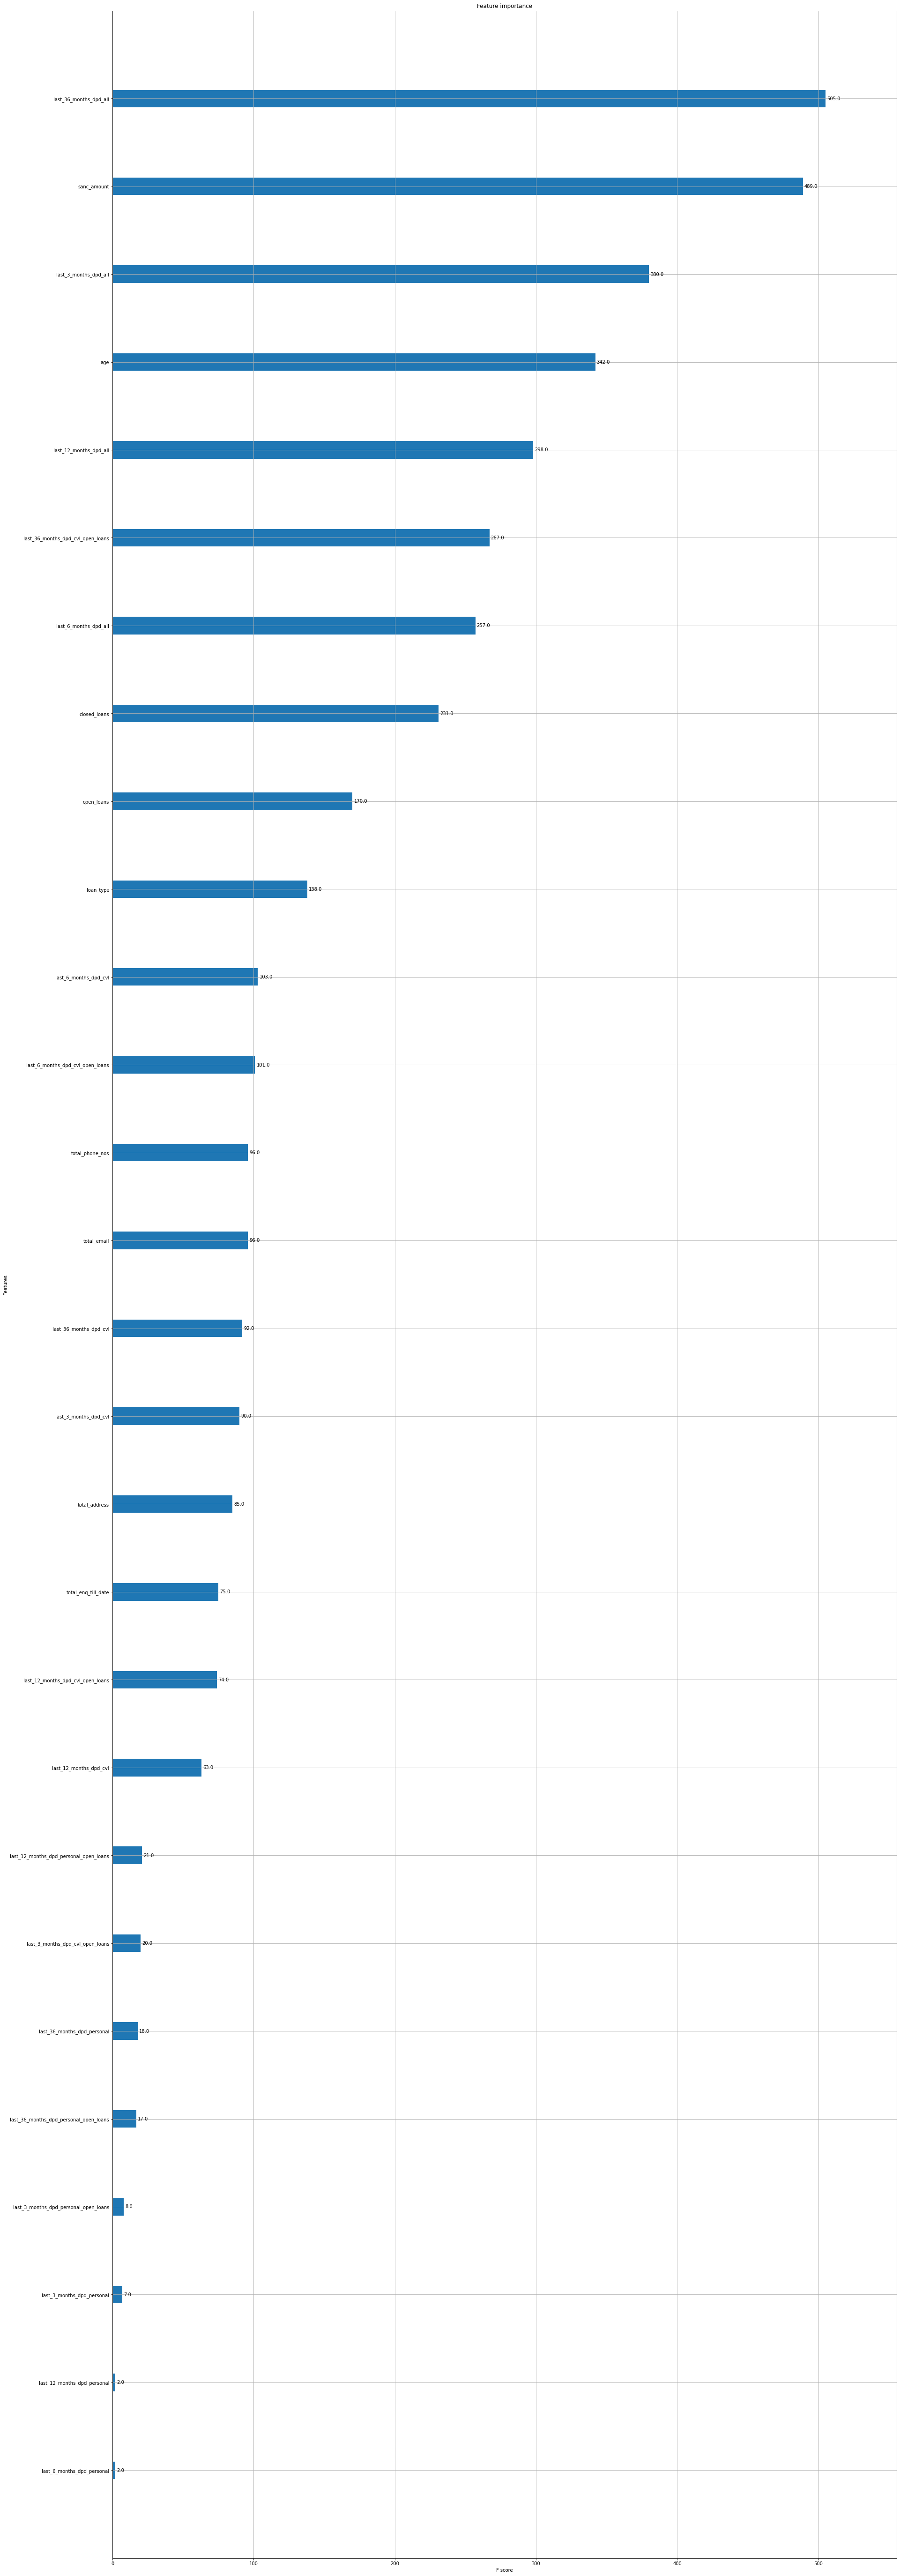

In [1288]:
from xgboost import plot_importance
from matplotlib import pyplot
plt.figure(figsize=(40,20))

plot_importance(xgb_classifier)
plt.rcParams["figure.figsize"] = (30,100)
plt.show()


In [222]:
# !cp xgb_cibil_classifier.pkl ../model_dir/

In [237]:
# xgb_model_loaded.predict(X_test)

### modify csvs

In [895]:
import glob 

In [896]:
# !ls /home/ubuntu/fin_services/cibil_data/test/cibil_pdf/*

In [316]:

(pd.read_csv(glob.glob('/home/ubuntu/fin_services/cibil_data/parsed_data/MADARI SRINIVAS CIBIL_Report - Shaik Wassi.csv')[0])['enquiry'])

0    [{'member_name': 'TVS CREDIT', 'enquiry_date':...
Name: enquiry, dtype: object

In [308]:
# pd.read_csv(glob.glob('/home/ubuntu/fin_services/cibil_data/parsed_data/*.csv')[0])

In [304]:
len(test_data)

29

In [248]:
df_t = pd.read_csv(test_data[0])

In [264]:
df_t.columns

Index(['name', 'gender', 'cibil_name', 'user_identifier', 'dob', 'address',
       'phone_no', 'email', 'acc_summary', 'enquiry', 'cibil_score', 'ACCOUNT',
       'DATES', 'AMOUNTS', 'DPD_INFO'],
      dtype='object')

In [266]:
df_t.head()

,name,gender,cibil_name,user_identifier,dob,address,phone_no,email,acc_summary,enquiry,cibil_score,ACCOUNT,DATES,AMOUNTS,DPD_INFO
0,NAVNATH HANUMANT PHADKE S/O HANUMANT,MALE,CIBILTUSC3,"{'PAN': 'BHEPP5637G', 'VOTER ID': 'KXH1109412'...",01/06/1977,"{'address': ' BURDE VASTI, MALI PETHA, CHARHOL...",9.198226e+11,NOEMAIL@YESBANK.IN,"{'total': ' 62', 'overdue': ' 2', 'zero_balanc...","{'member_name': 'TVS CREDIT', 'enquiry_date': ...",739.0,"{'member_name': 'NOT DISCLOSED', 'account_numb...","{'opened': '22-08-2022', 'last_payment': '', '...","{'sanctioned': ' 380,000', 'current_balance': ...",{'8-22': '000'}
1,NaN,NaN,NaN,NaN,NaN,{'address': ' AP H NO 756 KALUS TAL KHED DIST ...,9.822597e+09,NAVNATH57@GMAIL.COM,NaN,"{'member_name': 'NOT DISCLOSED', 'enquiry_date...",NaN,"{'member_name': 'NOT DISCLOSED', 'account_numb...","{'opened': '13-07-2022', 'last_payment': '', '...","{'sanctioned': ' 160,000', 'current_balance': ...","{'8-22': '000', '7-22': '000'}"
2,NaN,NaN,NaN,NaN,NaN,{'address': ' A/P KALUS TAL KHED DIST PUNE NEA...,9.822597e+09,NULL@GMAIL.COM,NaN,"{'member_name': 'NOT DISCLOSED', 'enquiry_date...",NaN,"{'member_name': 'NOT DISCLOSED', 'account_numb...","{'opened': '17-06-2022', 'last_payment': '', '...","{'sanctioned': ' 3,892,000', 'current_balance'...","{'7-22': '000', '6-22': '000'}"
3,NaN,NaN,NaN,NaN,NaN,{'address': ' 616 MALAVADI RASTACHYA KHALIL FA...,9.822597e+09,NA@MAIL.COM,NaN,"{'member_name': 'NOT DISCLOSED', 'enquiry_date...",NaN,"{'member_name': 'NOT DISCLOSED', 'account_numb...","{'opened': '24-05-2022', 'last_payment': ' 22-...","{'sanctioned': ' 4,340,231', 'current_balance'...","{'8-22': '000', '7-22': '000', '6-22': '000', ..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'member_name': 'NOT DISCLOSED', 'enquiry_date...",NaN,"{'member_name': 'NOT DISCLOSED', 'account_numb...","{'opened': '27-04-2022', 'last_payment': ' 15-...","{'sanctioned': ' 83,873', 'current_balance': '...","{'8-22': '000', '7-22': '000', '6-22': '000', ..."


In [289]:
def df_aligner(df):
    col_list = list(df.columns)
#     print(col_list)
    static_cols = ['name', 'gender', 'cibil_name', 'user_identifier', 'dob','cibil_score']
    col_dict = {}
    for col in col_list:
        list_val = df[col].isnull().tolist()
        col_val = df[col].tolist()
        if True in list_val:
            idx = list_val.index(True)
            
            col_dict[col]= [col_val[:idx]]
        else:
            col_dict[col]= [col_val]
#     print(col_dict)
    return pd.DataFrame(col_dict)

In [290]:
df_aligner(df_t)

,name,gender,cibil_name,user_identifier,dob,address,phone_no,email,acc_summary,enquiry,cibil_score,ACCOUNT,DATES,AMOUNTS,DPD_INFO
0,[ NAVNATH HANUMANT PHADKE S/O HANUMANT],[ MALE],[CIBILTUSC3],"[{'PAN': 'BHEPP5637G', 'VOTER ID': 'KXH1109412...",[ 01/06/1977],"[{'address': ' BURDE VASTI, MALI PETHA, CHARHO...","[919822596539.0, 9822596539.0, 9822596539.0, 9...","[NOEMAIL@YESBANK.IN, NAVNATH57@GMAIL.COM, NULL...","[{'total': ' 62', 'overdue': ' 2', 'zero_balan...","[{'member_name': 'TVS CREDIT', 'enquiry_date':...",[739.0],"[{'member_name': 'NOT DISCLOSED', 'account_num...","[{'opened': '22-08-2022', 'last_payment': '', ...","[{'sanctioned': ' 380,000', 'current_balance':...","[{'8-22': '000'}, {'8-22': '000', '7-22': '000..."


In [520]:
all_files = glob.glob('../cibil_data/parsed_data_v2/parsed_data/*.csv')

In [521]:
df_val = []
for file in all_files:
    df_val.append(pd.read_csv(file))

In [522]:
df_val = pd.concat(df_val)

In [523]:
df_val = df_val[df_val['output'].notna()]

In [401]:
df_val.shape

(44, 16)

In [525]:
def get_cibil_score(cibil_info):
    t=0
    for item in eval(cibil_info):
        if item.isnumeric():
            t=int(item)
            return int(item)
    if t==0:
        print(cibil_info)
    return -1

In [526]:
df_val['cibil_score'] = df_val['cibil_info_with_factors'].apply(lambda x:get_cibil_score(x))

['CIBILTUSC3', '-1']


In [414]:
df_val.dtypes

name                        object
gender                      object
cibil_info_with_factors     object
cibil_name                  object
user_identifier             object
dob                         object
address                     object
phone_no                    object
email                       object
acc_summary                 object
account_info                object
enquiry                     object
account_info_new            object
output_dict                 object
output                     float64
cibil_score                  int64
dtype: object

In [527]:
df_val = df_val[df_val['cibil_score'].notna()]

In [528]:
df_val

,name,gender,cibil_info_with_factors,cibil_name,user_identifier,dob,address,phone_no,email,acc_summary,account_info,enquiry,account_info_new,output_dict,output,cibil_score
0,NAVNATH HANUMANT PHADKE S/O HANUMANT,MALE,"['CIBILTUSC3', 'PRESENCE OF SEVERE DELINQUENCY...",CIBILTUSC3,"{'PAN': 'BHEPP5637G', 'VOTER ID': 'KXH1109412'...",01/06/1977,"[{'address': ' BURDE VASTI, MALI PETHA, CHARHO...","['919822596539', '9822596539', '9822596539', '...","['NOEMAIL@YESBANK.IN', 'NAVNATH57@GMAIL.COM', ...","{'total': ' 62', 'overdue': ' 2', 'zero_balanc...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member_name': 'TVS CREDIT', 'enquiry_date':...","[{'8-22': '000'}, {'8-22': '000', '7-22': '000...","{0: 0.36550528, 1: 0.6344947}",1.0,739
0,TEJAVATHU ARUNA,FEMALE,"['CIBILTUSC3', 'INCREASE IN NON-MORTGAGE INDEB...",CIBILTUSC3,"{'VOTER ID': 'TAC0122887', 'RATION CARD': 'WAP...",01/01/1986,[{'address': ' MANGAPURAM NELAKONDAPALLI CHERU...,"['8179280881', '9618105941']",[],"{'total': ' 5', 'overdue': ' 0', 'zero_balance...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member': 'NOT DISCLOSED', 'enquiry_date': '...","[{'9-22': 'STD'}, {'9-22': 'STD', '8-22': 'STD...","{0: 0.99934155, 1: 0.00065845955}",0.0,709
0,MA DHARI SRINIVAS,MALE,"['CIBILTUSC3', '741']",CIBILTUSC3,"{'PAN': 'BEIPM2300E', 'RATION CARD': 'WAP15844...",06/04/1981,"[{'address': ' HYD HYDERABAD 500037', 'categor...","['9848312117', '9849842096']",[],"{'total': ' 9', 'overdue': ' 0', 'zero_balance...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member_name': 'TVS CREDIT', 'enquiry_date':...","[{'1-20': '000', '12-19': '000', '11-19': '000...","{0: 0.99970436, 1: 0.0002956314}",0.0,741
0,ALUGUNURI CHINNA UPPALAIAH A YELLAIAH,MALE,"['CIBILTUSC3', 'INCREASE IN NON-MORTGAGE INDEB...",CIBILTUSC3,"{'PAN': 'ASRPA3107F', 'UNIVERSAL ID': '2638872...",24/04/1982,[{'address': ' HNO 15 957 3 SRI SAI RESDY PHAN...,"['919959010019', '9959010019']",[],"{'total': ' 12', 'overdue': ' 0', 'zero_balanc...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member': 'NOT DISCLOSED', 'enquiry_date': '...","[{'7-22': 'STD'}, {'3-22': 'STD', '2-22': 'STD...","{0: 0.9998512, 1: 0.00014877407}",0.0,755
0,RAMANJANEYULU BOYA,MALE,"['CIBILTUSC3', 'HIGH BALANCE BUILD-UP ON NON-M...",CIBILTUSC3,"{'PAN': 'ERIPR8243B', 'UNIVERSAL ID': '7887841...",24/05/1995,"[{'address': ' S/O CHANDRA SEKHAR, D NO HANUMA...","['8309140705', '8247679163', '9160658705', '82...",['PRAMANJINEYULUBOYA1995@GMAIL.COM'],"{'total': ' 4', 'overdue': ' 0', 'zero_balance...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member': 'NOT DISCLOSED', 'enquiry_date': '...","[{'8-22': '000', '7-22': '000'}, {'8-22': '000...","{0: 0.9993405, 1: 0.0006595379}",0.0,745
0,RAMESH KUMAR,MALE,"['CIBILTUSC3', 'HIGH BALANCE BUILD-UP ON NON-M...",CIBILTUSC3,"{'PAN': 'JCAPK0774E', 'VOTER ID': 'SOY0593129'...",15/07/1995,[{'address': ' WARD 01 GUMANA KA WAS AJARI BAR...,"['8441904646', '8595621027', '9828440763', '84...",['RAMESHMAHALA62@GMAIL.COM'],"{'total': ' 4', 'overdue': ' 0', 'zero_balance...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member': 'NOT DISCLOSED', 'enquiry_date': '...","[{'10-22': '000', '9-22': '000', '8-22': '000'...","{0: 0.9989606, 1: 0.0010393843}",0.0,758
0,JAI SINGH S/O SWAROOP SINGH,MALE,"['CIBILTUSC3', 'PRESENCE OF DELINQUENCY AS OF ...",CIBILTUSC3,"{'PAN': 'FAYPS5323H', 'VOTER ID': 'SFK/0557462...",12/05/1991,[{'address': ' NAMAN ENTERPRISES IC 13 GUJAR B...,"['09785257344', '9785257344', '01419785257344']","['JAISINGH3357@GMAIL.COM', 'NOMAIL@NOMAIL.COM']","{'total': ' 6', 'overdue': ' 1', 'zero_balance...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member': 'NOT DISCLOSED', 'enquiry_date': '...","[{'8-22': '011', '7-22': '000', '6-22': '000',...","{0: 0.97579336, 1: 0.02420664}",0.0,705
0,BORRACHINNAVENKATARAO NARESH,MALE,"['CIBILTUSC3', 'PRESENCE OF DELINQUENCY', '701...",CIBILTUSC3,"{'PAN': 'CDVPN7402B', 'VOTER ID': 'WQN1143229'...",10/09/1994,[{'addr

In [529]:
df_val['cibil_score'].describe()

count     44.000000
mean     703.500000
std      118.375536
min       -1.000000
25%      690.000000
50%      727.000000
75%      752.750000
max      790.000000
Name: cibil_score, dtype: float64

In [664]:
df_val[df_val['cibil_score']>727].shape

(22, 17)

In [666]:
df_bb.shape

(1152, 24)

In [531]:
df_val[df_val['cibil_score']>727]['output'].tolist().count(0)

20

In [534]:
df_val['zero_prob'] = df_val['output_dict'].apply(lambda x:eval(x)[0])

In [535]:
new_df_val = df_val.sort_values('zero_prob',ascending=False)

In [547]:
new_df_val['name'] = new_df_val['name'].apply(lambda x:x.strip())

In [536]:
new_df_val[new_df_val['cibil_score']>600][['cibil_score','zero_prob']].corr()

,cibil_score,zero_prob
cibil_score,1.000000,0.425129
zero_prob,0.425129,1.000000


In [650]:
# new_df_val

In [537]:
df_bb = pd.read_csv('../cibil_data/bb_val_sample/FS OwnBook - Loan Status Tracker Nov\'22 (Confidential) - 3.Cibil Check Master.csv')

In [543]:
df_bb.columns = df_bb.iloc[0]

In [550]:
df_bb.columns

Index(['TIMESTAMP', 'Month', 'Date', 'Zone', 'State', 'Branch Code',
       'Branch Name', 'CRO/BM Emp Code', 'CRO/BM Name', 'Borrower Name',
       'Borrower PAN', 'Applicant Mob #', 'Fasttrack ID',
       'Applicant \nCibil Score', 'Applicant\nCibil Report',
       'Applicant \nOK/NOT OK', 'Co-Applicant \nCibil Score',
       'Co-Applicant\nCibil Report', 'Co-Applicant \nOK/NOT OK',
       'Guarantor\nCibil Score', 'Guarantor\nCibil Report',
       'Guarantor\nOK/NOT OK', 'Soft Sanction\nY/N\n(MH, TS)',
       'MS1: Sanction Requested (Y/N)'],
      dtype='object', name=0)

In [553]:
df_bb['Borrower Name'] = df_bb['Borrower Name'].apply(lambda x:x.strip() if type(x)=='str' else x)

In [558]:
df_bb.merge(new_df_val,left_on='Borrower Name',right_on='name')[['name','cibil_score','output','Applicant \nOK/NOT OK']]

,name,cibil_score,output,Applicant \nOK/NOT OK
0,KAMMARI ANAND KUMAR,687,0.0,OK
1,UNNAMATLA SUDHA DEVI,687,0.0,NOT OK
2,BONTHI RANGA MANI,696,0.0,OK
3,RAMESH KUMAR,758,0.0,OK


In [562]:
new_df_val.reset_index(inplace=True)

In [1043]:
new_df_val['user_identifier'][0]

"{'PAN': 'BRYPK9541E', 'UNIVERSAL ID': '987405362319'}"

In [1044]:
def map_bb_files_with_val(df_bb,df_val):
    
    dfs=[]
    for i,r in df_val.iterrows():
        name=phone=cibil_score=output=is_ok=''
        name=r['name']
        uid = eval(r['user_identifier'])
        pan_id = ''
        if 'PAN' in uid:
            pan_id=uid['PAN']
        phone_nos = eval(r['phone_no'])
        
        if pan_id !='':
            is_ok_l = df_bb[df_bb['Borrower PAN']==pan_id]['Applicant \nOK/NOT OK'].tolist()
            if len(is_ok_l)>0:
                print(is_ok_l)
                is_ok=is_ok_l[0]
                
        elif len(phone_nos)>0:
#             print(phone_nos)
            for ph_no in phone_nos:
                t=df_bb[df_bb['Applicant Mob #']==ph_no]['Applicant \nOK/NOT OK'].tolist()
                if len(t)>0:
                    is_ok=t[0]
                    break
        else:
            pass
                

        temp_df = pd.DataFrame({'name':[name],'cibil_score':[r['cibil_score']],'output':[r['output']], 'is_ok_bb':[is_ok]}
                              )
        dfs.append(temp_df)
    return pd.concat(dfs)
        
        
        
    

In [1046]:
v1 = map_bb_files_with_val(df_bb,new_df_val)

['OK']
['OK']
['OK']
['OK']
['OK']
['OK']
['OK']
['OK']
['NOT OK']
['OK']
['OK']
['NOT OK']
['OK']
['OK']
['OK']
['OK']
['OK']
['OK']
['OK']
['OK']
['OK']
['OK']


In [1047]:
v1['is_ok_bb'] = v1.apply(lambda x: 'NOT OK' if (x['cibil_score'])<600 else x['is_ok_bb'],axis=1)

In [1048]:
v1 = v1[v1['is_ok_bb']!='']

In [1049]:
v1.shape

(26, 4)

In [1050]:
v1[(v1['output']!=0) & (v1['is_ok_bb']!='OK')].shape

(2, 4)

In [1052]:
v1[((v1['output']==0) & (v1['is_ok_bb']=='OK')) ].shape

(18, 4)

In [1055]:
v1[v1['output']!=0].shape

(6, 4)

In [591]:
v1[((v1['output']==0) & (v1['is_ok_bb']=='OK')) | ((v1['output']!=0) & (v1['is_ok_bb']!='OK'))].shape

(20, 4)

In [586]:
17/23

0.7391304347826086

In [604]:
df_bb1 = pd.read_csv('../cibil_data/bb_val_sample/FS OwnBook - Loan Status Tracker Nov\'22 (Confidential) - 5.Files Master.csv')

In [633]:
# df_bb1.columns.tolist()

In [622]:
df_bb1 = df_bb1[['Back to Index','Unnamed: 1','Unnamed: 2','Unnamed: 27']].dropna()

In [623]:
df_bb1.columns = df_bb1.iloc[0]

In [631]:
df_bb1 = df_bb1[1:]

In [632]:
df_bb1.columns

Index(['Truck Number', 'Applicant Name', 'Applicant Mobile Number',
       'TS 3: BB Sanctioned'],
      dtype='object', name=2)

In [634]:
df_bb.columns

Index(['TIMESTAMP', 'Month', 'Date', 'Zone', 'State', 'Branch Code',
       'Branch Name', 'CRO/BM Emp Code', 'CRO/BM Name', 'Borrower Name',
       'Borrower PAN', 'Applicant Mob #', 'Fasttrack ID',
       'Applicant \nCibil Score', 'Applicant\nCibil Report',
       'Applicant \nOK/NOT OK', 'Co-Applicant \nCibil Score',
       'Co-Applicant\nCibil Report', 'Co-Applicant \nOK/NOT OK',
       'Guarantor\nCibil Score', 'Guarantor\nCibil Report',
       'Guarantor\nOK/NOT OK', 'Soft Sanction\nY/N\n(MH, TS)',
       'MS1: Sanction Requested (Y/N)'],
      dtype='object', name=0)

In [637]:
df_merge = df_bb.merge(df_bb1,left_on='Applicant Mob #',right_on='Applicant Mobile Number')

In [933]:
# new_df_val[new_df_val['B']]

In [914]:
df_merge

,TIMESTAMP,Month,Date,Zone,State,Branch Code,Branch Name,CRO/BM Emp Code,CRO/BM Name,Borrower Name,...,Co-Applicant \nOK/NOT OK,Guarantor\nCibil Score,Guarantor\nCibil Report,Guarantor\nOK/NOT OK,"Soft Sanction\nY/N\n(MH, TS)",MS1: Sanction Requested (Y/N),Truck Number,Applicant Name,Applicant Mobile Number,TS 3: BB Sanctioned
0,10/1/2022 11:45:30,Oct-22,1-Oct-2022,South,TS,TS_05,Warangal,Z5792,Raju Kore,MEKALA UMA,...,NaN,NaN,NaN,NaN,NaN,YES,TS03UA8013,MEKALA UMA\t,8179310955,11/29/2022 6:47 PM
1,10/3/2022 11:17:12,Oct-22,3-Oct-2022,South,TN,TN_07,Tirunelveli,Z5377,Iyappan Malaiyandi,SUBRAMANIAN V,...,NaN,NaN,NaN,NaN,NaN,YES,TN69BJ5858,Mr. SUBRAMANIAN,9442028904,10/25/2022 12:46 PM
2,10/6/2022 9:47:22,Oct-22,6-Oct-2022,South,TS,TS_02,Hyderabad 1 - Bowenpally/ Kukatpally,Z5710,Buregoju Bharath Kumar,SHAIK SHAKEEL,...,NaN,NaN,NaN,NaN,NaN,YES,TS08UF3813,SHAIK SHAKEEL,7989314960,10/13/2022 10:24 PM
3,10/6/2022 13:34:06,Oct-22,6-Oct-2022,NaN,NaN,NaN,NaN,Z5495,NaN,ALIKANA NARSING RAO,...,NaN,NaN,NaN,NaN,NaN,YES,AP35X3320,ALIKANA GOWRI\t,9494588116,2022-11-23 9:05 PM
4,10/10/2022 17:41:30,Oct-22,10-Oct-2022,South,TN,TN_07,Tirunelveli,Z5377,Iyappan Malaiyandi,ARUMUGADOSS,...,NaN,NaN,NaN,NaN,NaN,YES,TN72AK6422,ARUMUGADOSS,9600337143,10/28/2022 9:34
5,10/14/2022 10:02:48,Oct-22,14-Oct-2022,South,TS,TS_05,Warangal,Z5800,Sabbani Krishnaprasad,JATTANGI LINGAIH,...,NaN,NaN,NaN,NaN,NaN,YES,TS17T4750,JATANGI LINGANNA,8978317880,11/4/22 17:08
6,10/14/2022 12:29:12,Oct-22,14-Oct-2022,West,NaN,MH2_04,Nashik,Z5768,Somnath Ashok Revgade,DINKAR SAMPAT JADHAV,...,OK,NaN,NaN,NaN,NaN,YES,MH15FV8609,DINKAR SAMPAT JADHAV,9623687014,10/22/2022 5:41 PM
7,10/15/2022 12:43:43,Oct-22,15-Oct-2022,West,MH1,MH1_01,Mumbai 2 - Borivali/Vasai,Z5817,Ajitkumar Mayalal Mishra,RAMESH DHAGO BHOIR,...,NaN,NaN,NaN,NaN,NaN,YES,MH04HS6364\t,RAMESH DHAGO BHOIR,9226729482,11/4/2022 3:41 PM
8,10/15/2022 12:48:55,Oct-22,15-Oct-2022,South,AP,AP_04,Srikakulam,Z5504,Noolu Lokeswara Rao,SHIVA BUKKURU,...,NaN,NaN,NaN,NaN,NaN,YES,AP30TC1632\t,BUKKURU SHIVA\t,8247883874,11/5/2022 10:06
9,10/18/2022 13:23:25,Oct-22,18-Oct-2022,South,AP,AP_04,Srikakulam,Z5886,Oliginti Janardhana,SHANKARARAO DOKI,...,NaN,NaN,NaN,NaN,NaN,YES,AP30TA3635,SAVARA JOHN,9676765639,11/16/2022 2:58 PM


In [925]:
!pwd

/home/ubuntu/fin_services/pd_modeling


In [926]:
test_list = glob.glob('/home/ubuntu/fin_services/cibil_data/parsed_data/*.csv')

 mob_no	pan_no	pdf_link	truck_number	fo_id	is_approved	In train (Y/N)	has GPS	has FastTag	is LB Active

In [927]:
df_map = pd.read_csv('../cibil_data/mapped_truck_data.csv')

In [934]:
df_map

,truck_id,sp_id,mobile_no,fleet_owner_id,truck_number,is_verified
0,1998735,3346249,9929788962,2113197,RJ07GD0852,0
1,1902295,2992275,9494033919,1825854,AP05TG0279,0
2,1894609,2992275,9494033919,1825854,AP37TD8514,0
3,2487984,3775904,9785257344,3030839,RJ45GA0820,0


In [931]:
ldf=[]
for item in test_list:
    df_temp = pd.read_csv(item)
    pdf_link = item.replace('parsed_data','test/cibil_pdf').replace('.csv','.PDF')
    phone_nos = eval(df_temp['phone_no'][0])
    uid = eval(df_temp['user_identifier'][0])
    pan_id = ''
    if 'PAN' in uid:
        pan_id=uid['PAN']
    truck_no = ''
    is_verified=False
    if (len(phone_nos))>0:
        for mob_no in phone_nos:
            tk_list=df_merge[df_merge['Applicant Mob #']==mob_no]['Truck Number'].tolist()
            if len(tk_list)>0:
                truck_no=tk_list[0]
                t = df_merge[df_merge['Applicant Mob #']==mob_no]['TS 3: BB Sanctioned'].tolist()
                if len(t)>0:
                    is_verified=True
                break
    fo_id=''
    
    if truck_no !='':
        fo_id = df_map[df_map['truck_number']==truck_no]['fleet_owner_id'].tolist()
        if len(fo_id)>0:
            fo_id=fo_id[0]
        else:
            fo_id=''
    else:
        
    
    
    ldf.append(pd.DataFrame({'truck_number':[truck_no],'mobile_no':[phone_nos],'pdf_link':[pdf_link],'pan_id':[pan_id],'fo_id':[fo_id],'is_approved':[is_verified]}))
        
    

In [932]:
pd.concat(ldf)

,truck_number,mobile_no,pdf_link,pan_id,fo_id,is_approved
0,,"[919822596539, 9822596539, 9822596539, 9822596...",/home/ubuntu/fin_services/cibil_data/test/cibi...,BHEPP5637G,,False
0,,"[8179280881, 9618105941]",/home/ubuntu/fin_services/cibil_data/test/cibi...,,,False
0,,"[9848312117, 9849842096]",/home/ubuntu/fin_services/cibil_data/test/cibi...,BEIPM2300E,,False
0,,"[919959010019, 9959010019]",/home/ubuntu/fin_services/cibil_data/test/cibi...,ASRPA3107F,,False
0,,"[8309140705, 8247679163, 9160658705, 8297932709]",/home/ubuntu/fin_services/cibil_data/test/cibi...,ERIPR8243B,,False
0,,"[8441904646, 8595621027, 9828440763, 8441971005]",/home/ubuntu/fin_services/cibil_data/test/cibi...,JCAPK0774E,,False
0,,"[09785257344, 9785257344, 01419785257344]",/home/ubuntu/fin_services/cibil_data/test/cibi...,FAYPS5323H,,False
0,,"[919550076291, 9550076291]",/home/ubuntu/fin_services/cibil_data/test/cibi...,CDVPN7402B,,False
0,,[919959024709],/home/ubuntu/fin_services/cibil_data/test/cibi...,BHCPT4233Q,,False
0,,[8106109317],/home/ubuntu/fin_services/cibil_data/test/cibi...,AUWPA7167Q,,False


In [646]:
df_merge['Applicant Mob #'][0]

'8179310955'

In [645]:
# df_val

In [652]:
v1 = map_bb_files_with_val(df_merge,new_df_val)

In [649]:
v1

,name,cibil_score,output,is_ok_bb
0,RATHNAKAR REDDY KARRA,714,0.0,
0,PONNANA APPA NNA,785,0.0,
0,MEKA SYAMUNDESWARI,747,0.0,
0,DUNDAPPA WALI SHIVAPUTRAPPA,746,0.0,
0,BHUVANAIKAVA RAO CHITTUKURI,744,0.0,
0,BUDDAPATHINI SARASWATHI,790,0.0,
0,VAHIL MALANG SHAIKH,752,0.0,
0,ALUGUNURI CHINNA UPPALAIAH A YELLAIAH,755,0.0,
0,SARGUNARAJ J,764,0.0,
0,MA DHARI SRINIVAS,741,0.0,


In [367]:
t = (pd.read_csv('../cibil_data/parsed_data/SALEEM SAYYAD CIBIL_Report - Shaik Wassi.csv'))
change_cols = ['cibil_info_with_factors', 'address', 'phone_no', 'email', 'acc_summary', 'account_info','enquiry','account_info_new']
for col in change_cols:
    t[col] = t[col].apply(lambda x:eval(x))

In [371]:
t

,name,gender,cibil_info_with_factors,cibil_name,user_identifier,dob,address,phone_no,email,acc_summary,account_info,enquiry,account_info_new
0,SAYYADSALEEM SAYYAD JALAL,MALE,"[CIBILTUSC3, 747]",CIBILTUSC3,"{'PAN': 'FTIPS5017M', 'VOTER ID': 'HLS2642262'...",01/01/1966,"[{'address': ' 155 WAGHI RAOD ,HASSAPUR TQ DIS...",[8888307285],[NULL@GMAIL.COM],"{'total': ' 1', 'overdue': ' 0', 'zero_balance...","[{'ACCOUNT': {'member_name': 'NOT DISCLOSED', ...","[{'member': 'NOT DISCLOSED', 'enquiry_date': '...","[{'7-22': '000', '6-22': '000', '5-22': '000',..."


In [368]:
def get_enquiry_table(df): 
    df_n = []
#     print(df.enquiry)
    for idx,row in df.iterrows():
        user_id = row.name
        enq_info = row['enquiry']
        for elem in enq_info:
            date = elem['enquiry_date']
            enq_purpose = elem['enquiry_purpose']
            try:
                enq_amt = get_sanc_amt(elem['enquiry_amount'])
            except:
                print(elem)
                break
            df_enq = pd.DataFrame({'user_id':[user_id],'date':[date],'enq_purpose':[enq_purpose],'enq_amount':[enq_amt]})
            df_n.append(df_enq)
         
    if len(df_n)<1:
        return pd.DataFrame({'user_id':[user_id],'date':[''],'enq_purpose':[''],'enq_amount':['']})
    return pd.concat(df_n)

In [369]:
get_enquiry_table(t)

,user_id,date,enq_purpose,enq_amount
0,0,07-09-2020,Commercial Vehicle Loan,484000
0,0,07-09-2020,Commercial Vehicle Loan,484000
0,0,05-09-2020,Commercial Vehicle Loan,495000


In [384]:
def get_dpd_raw_table(df):
    dfs = [] 
#     print()
    for idx,row in df.iterrows():
        user_id = row.name 
        acc_info_list = row['account_info']
        dpd_info_json = row['account_info_new']
        print(len(dpd_info_json))
#         print()
        for i in range(len(acc_info_list)):
            print(acc_info_list[i])
            loan_id = i 
            loan_info = acc_info_list[i]
            sanc_amount =''
            loan_type = loan_info['ACCOUNT']['TYPE']
            ownership = loan_info['ACCOUNT']['ownership']
            if 'sanctioned' in loan_info['AMOUNTS']:
                sanc_amount=loan_info['AMOUNTS']['sanctioned']
            interest_rate = loan_info['AMOUNTS']['interest_rate']
            repayment_tenure = loan_info['AMOUNTS']['repay_tenure']
            emi_amount = loan_info['AMOUNTS']['emi']
            pmt_freq = loan_info['AMOUNTS']['pmt_freq']
            open_date = loan_info['DATES']['opened']
            closed_date = loan_info['DATES']['closed']
#             dpd_list = loan_info['PaymentHistory']['dayPayDue']
            timestamp_json = dpd_info_json[i]
            for k,v in timestamp_json.items():
                is_open=1
                is_closed=0
                ## dd-mm-yyyy
                print(closed_date)
                
                
#                     print(closed_date)
                try:

                    curr_timestamp = pd.to_datetime(k,format='%m-%y')
                    closed_date_m_y = pd.to_datetime(closed_date,dayfirst=True)
                    if len(closed_date.split('-'))>=3:
                        
                        if curr_timestamp.year==closed_date_m_y.year and curr_timestamp.month==closed_date_m_y.month:
                            is_open=0
                            is_closed=1
                    df_dpd = pd.DataFrame({'user_id':[user_id],'loan_id':[loan_id],'timestamp':[k],'dpd':[v],'loan_type':[loan_type],'ownership':[ownership],'sanc_amount':[sanc_amount], 'interest_rate':[interest_rate], 
                                  'repayment_tenure':[repayment_tenure],'emi_amount':[emi_amount],'pmt_freq':[pmt_freq],'open_date':[open_date],
                                  'closed_date':[closed_date],'is_open':[is_open],'is_closed':[is_closed]})
                    dfs.append(df_dpd)
                except:
                    break
                

                    
                        
    return pd.concat(dfs)

In [388]:
pd.DataFrame({}).shape

(0, 0)

In [1296]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [1297]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)


/home/ubuntu/anaconda3/envs/faiss/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1299]:
t_mlp = clf.predict(X_test)

# clf.predict(X_test[:5, :])

# clf.score(X_test, y_test)

In [1300]:
print(classification_report(t_mlp,predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        92
           1       0.30      0.60      0.40        10

    accuracy                           0.82       102
   macro avg       0.63      0.72      0.65       102
weighted avg       0.89      0.82      0.85       102

